1. Import all needed tools
2. Define all cleaned datas.
3. Goal: Seeing the counts, basic statisctics and basic graphs to create relationship between datasets and datas

In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine, types
from sqlalchemy import text 

In [71]:
s_1 = pd.read_csv('../data/Staging/staging_world_marriage.csv')
c_2 = pd.read_csv('../data/Cleaned/cleaned_countries_1970_2025_un.csv')
c_3 = pd.read_csv('../data/Cleaned/cleaned_marital_status_by_age_un.csv')
c_4 = pd.read_csv('../data/Cleaned/cleaned_fertility_indicators_un.csv', low_memory=False)
c_5 = pd.read_csv('../data/Cleaned/cleaned_ever_married_un.csv')
c_6 = pd.read_csv('../data/Cleaned/cleaned_currently_married_un.csv')
c_7 = pd.read_csv('../data/Cleaned/cleaned_regions_un.csv')
c_8 = pd.read_csv('../data/Cleaned/cleaned_unpopulation_dataportal.csv')
c_9 = pd.read_csv('../data/Cleaned/cleaned_age_at_marriage_women.csv')
c_10 = pd.read_csv('../data/Cleaned/cleaned_marriage-rate-per-1000-inhabitants.csv')
c_11 = pd.read_csv('../data/Cleaned/cleaned_marriage-rates-in-1990-vs-2020.csv')
c_12 = pd.read_csv('../data/Cleaned/cleaned_share-of-births-outside-marriage.csv')
c_13 = pd.read_csv('../data/Cleaned/cleaned_share-of-men-in-england-and-wales-who-have-ever-married-by-age.csv')
c_14 = pd.read_csv('../data/Cleaned/cleaned_share-of-women-in-england-and-wales-who-have-ever-married-by-age.csv')
c_15 = pd.read_csv('../data/Cleaned/cleaned_share-of-single-parent-households.csv')
c_16 = pd.read_csv('../data/Cleaned/cleaned_average_size_of_households_type_2024_oecd.csv')
c_17 = pd.read_csv('../data/Cleaned/cleaned_types_of_household_2021_oecd.csv')
c_18 = pd.read_csv('../data/Cleaned/cleaned_households_by_number_of_children_2024_oecd.csv')
c_19 = pd.read_csv('../data/Cleaned/cleaned_total_fertility_rates_oecd.csv')
c_20 = pd.read_csv('../data/Cleaned/cleaned_births_by_birth_order_oecd.csv')
c_21 = pd.read_csv('../data/Cleaned/cleaned_household_children_oecd.csv')
c_22 = pd.read_csv('../data/Cleaned/age_of_mothers_at_childbirth_oecd.csv')
c_23 = pd.read_csv('../data/Cleaned/fertility_per_1000_from_1960_oecd.csv')
c_24 = pd.read_csv('../data/Cleaned/cleaned_fertility_per_1000_from_2000_oecd.csv')
c_25 = pd.read_csv('../data/Cleaned/cleaned_share-of-births-outside-marriage.csv')
c_26 = pd.read_csv('../data/Cleaned/cleaned_mean_age_first_marriage_oecd.csv')
c_27 = pd.read_csv('../data/Cleaned/cleaned_divorce_rates_per_1000_oecd.csv')
c_28 = pd.read_csv('../data/Cleaned/cleaned_share_of_previous_marital_status_oecd.csv')
c_29 = pd.read_csv('../data/Cleaned/cleaned_hauseholds_by_partnership_status_oecd.csv')
c_30 = pd.read_csv('../data/Cleaned/cleaned_level_of_educational_attainment_oecd.csv')


In [72]:
print(s_1.info())
print(s_1.describe())
print(s_1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266249 entries, 0 to 266248
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country                     266249 non-null  object
 1   age_group                   266249 non-null  object
 2   sex                         266249 non-null  object
 3   marital_status              266249 non-null  object
 4   data_process                266249 non-null  object
 5   data_collection_start_year  266249 non-null  int64 
 6   data_collection_end_year    266249 non-null  int64 
 7   data_source                 266249 non-null  object
dtypes: int64(2), object(6)
memory usage: 16.3+ MB
None
       data_collection_start_year  data_collection_end_year
count               266249.000000             266249.000000
mean                  1997.094059               1997.191467
std                     14.187404                 14.227446
min                   19

<Figure size 1200x800 with 0 Axes>

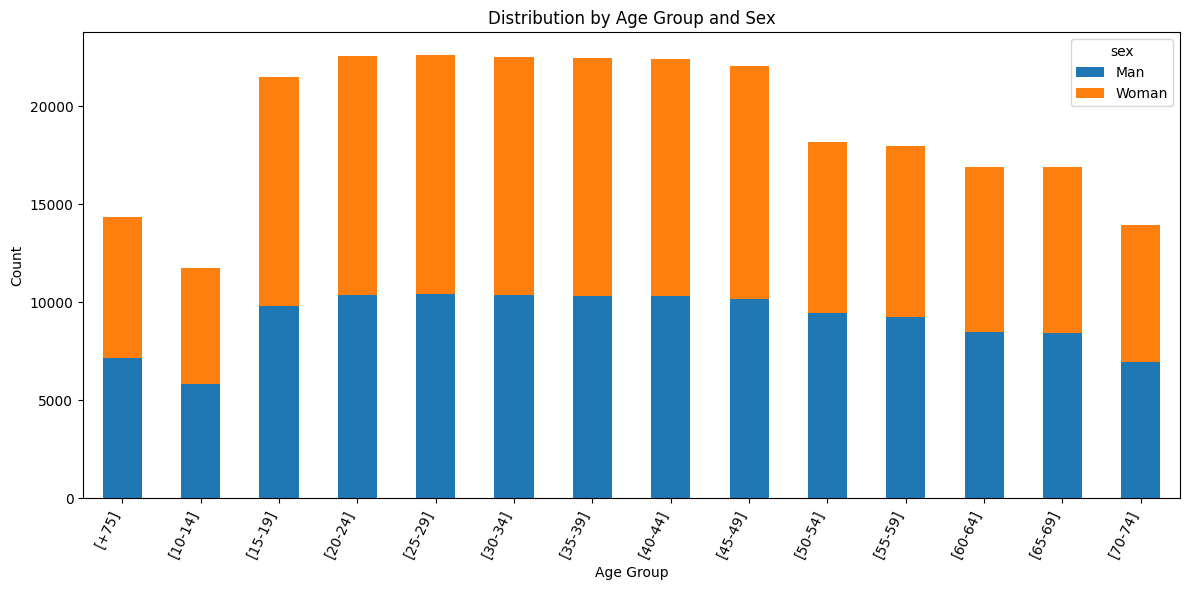

In [73]:
plt.figure(figsize=(12,8))
age_sex_counts = s_1.groupby(['age_group', 'sex']).size().unstack()
age_sex_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

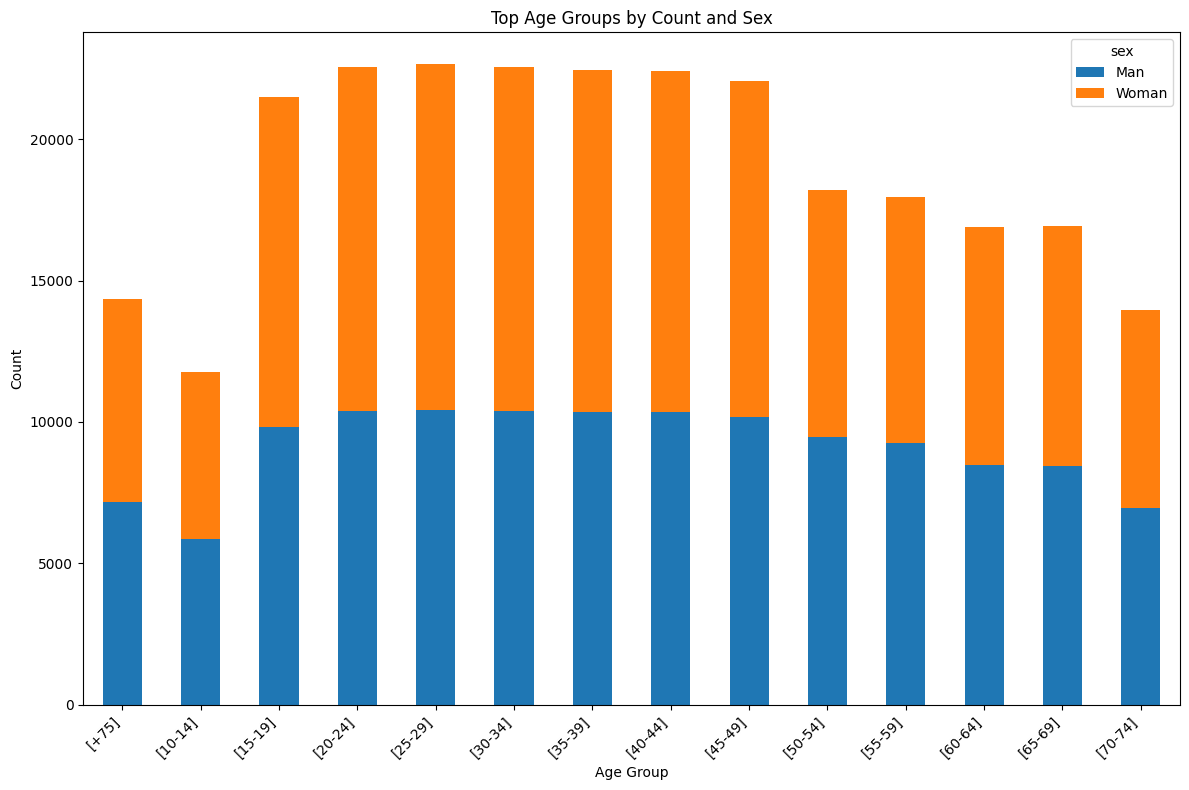

In [74]:
top_age_groups = s_1['age_group'].value_counts().nlargest(14).index
age_sex_counts_top = s_1[s_1['age_group'].isin(top_age_groups)].groupby(['age_group', 'sex']).size().unstack()
age_sex_counts_top.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Top Age Groups by Count and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

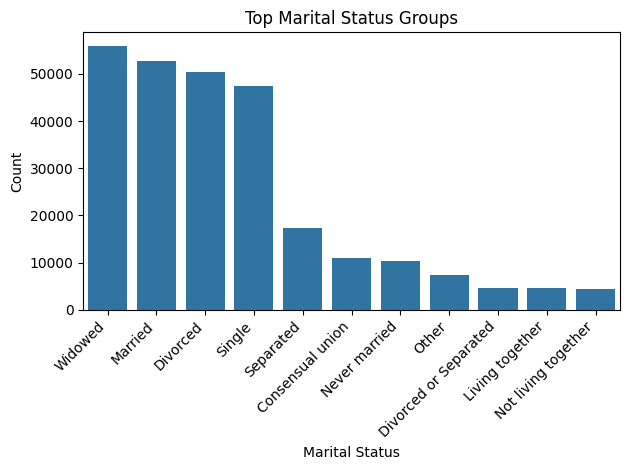

In [75]:
marital_counts = s_1['marital_status'].value_counts()
top_n = 10
top_categories = marital_counts.index[:top_n]
s_1['marital_status_grouped'] = s_1['marital_status'].apply(lambda x: x if x in top_categories else 'Other')

grouped_counts = s_1['marital_status_grouped'].value_counts()
sns.barplot(x=grouped_counts.index, y=grouped_counts.values)
plt.title('Top Marital Status Groups')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

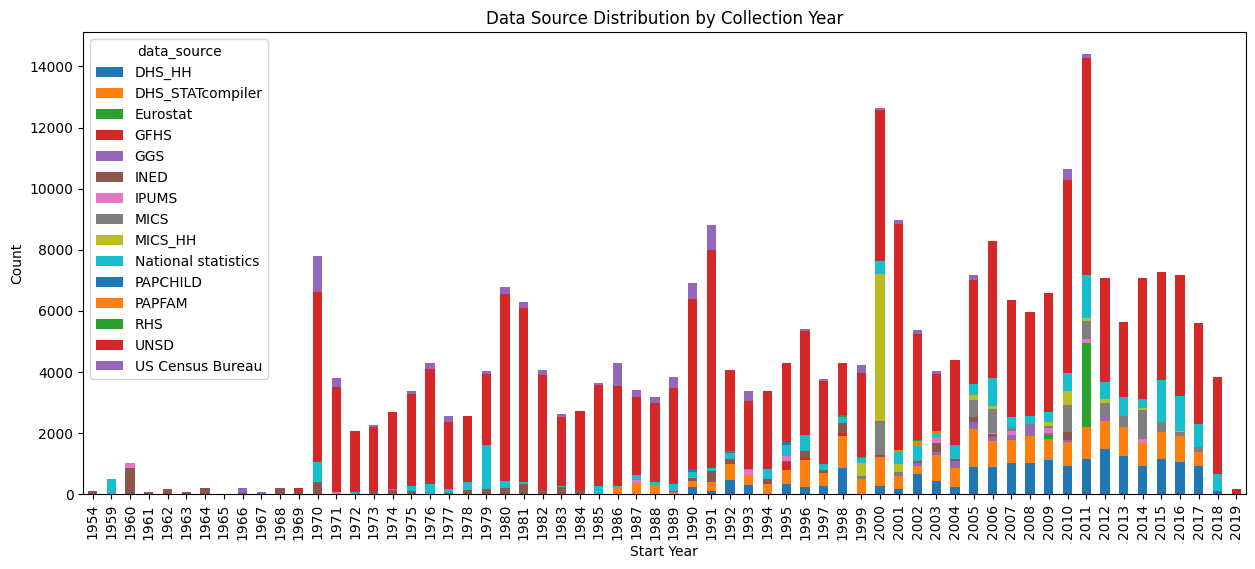

In [76]:
source_year_counts = s_1.groupby(['data_collection_start_year', 'data_source']).size().unstack(fill_value=0)
source_year_counts.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Data Source Distribution by Collection Year')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1047 non-null   object 
 1   code                                 1047 non-null   object 
 2   year                                 1047 non-null   int64  
 3   mean_age_of_women_at_first_marriage  1047 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.8+ KB
None
              year  mean_age_of_women_at_first_marriage
count  1047.000000                          1047.000000
mean   2005.023878                            27.683043
std       8.689371                             2.532542
min    1990.000000                            20.000000
25%    1998.000000                            25.900000
50%    2005.000000                            27.700000
75%    2012.000000                    

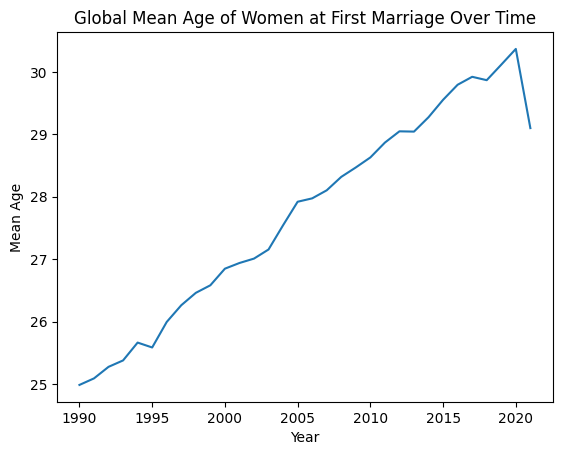

In [77]:
# EDA & Visualization
print(c_9.info())
print(c_9.describe())
print(c_9.head())

# Global mean age over time
yearly_age = c_9.groupby('year')['mean_age_of_women_at_first_marriage'].mean().reset_index()
sns.lineplot(data=yearly_age, x='year', y='mean_age_of_women_at_first_marriage')
plt.title('Global Mean Age of Women at First Marriage Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.show()

Shape: (145800, 8)
Detected -> YEAR: year | COUNTRY: country | REGION: agegroup | VALUE: number
Columns: ['countryorarea', 'isocode', 'indicator', 'year', 'agegroup', 'percentage', 'number', 'data_process']

Missing % by column:
 countryorarea    0.0
isocode          0.0
indicator        0.0
year             0.0
agegroup         0.0
percentage       0.0
number           0.0
data_process     0.0
dtype: float64

Year span: 1970–2050
Unique groups in agegroup: 8


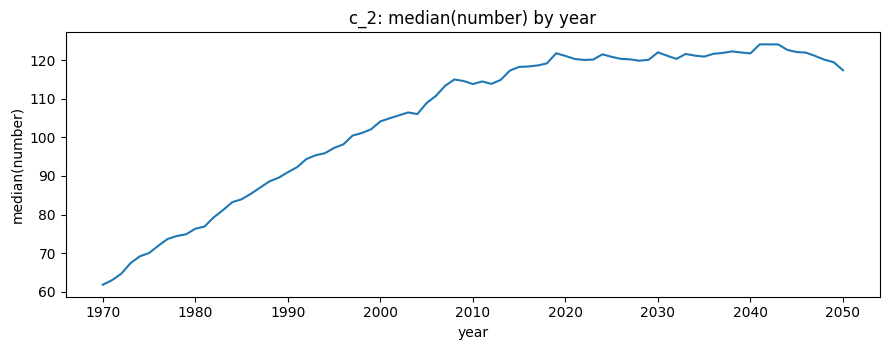

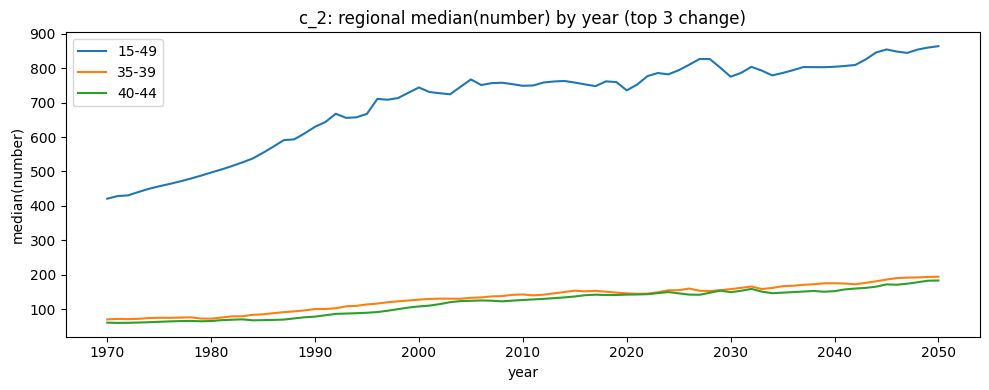

In [84]:
COUNTRY_COL = "country"

def pick_year_col(df: pd.DataFrame):
    hints = ["year","time","period","yr","refyear","ref_year"]
    for c in df.columns:
        lc = c.lower()
        if any(h in lc for h in hints):
            if pd.to_numeric(df[c], errors="coerce").notna().any():
                return c
    return None

def choose_value_col(df: pd.DataFrame, year_col: str | None):
    """Pick a numeric column that varies across years the most."""
    preferred = ["value","rate","percentage","percent","ratio","number","count","index","score"]
    # numeric + numeric-coercible
    candidates = []
    for c in df.columns:
        if c == year_col or c == COUNTRY_COL: 
            continue
        ser = pd.to_numeric(df[c], errors="coerce")
        if ser.notna().sum() > 0:
            candidates.append((c, ser))
    if not candidates:
        return None
    # order by preferred name first
    candidates.sort(key=lambda x: (0 if x[0].lower() in preferred else 1, x[0].lower()))
    # score by std of yearly medians (need >=5 years, >1 unique)
    best, best_score = None, -np.inf
    y = pd.to_numeric(c_2[year_col], errors="coerce") if year_col else None
    for c, ser in candidates:
        if year_col is None:
            # fallback: simply use overall variance
            score = float(ser.std())
        else:
            tmp = pd.DataFrame({year_col: y, c: ser}).dropna()
            if tmp.empty: 
                continue
            yr = tmp.groupby(year_col)[c].median()
            if len(yr) < 5 or yr.nunique() < 2:
                continue
            score = float(yr.std())
        if score > best_score:
            best, best_score = c, score
    return best

def pick_region_like(df: pd.DataFrame):
    """Pick a non-country categorical grouping suitable for time trends."""
    hints = [
        "region","subregion","continent","income_group","incomelevel",
        "macroregion","world_bank_region","un_region"
    ]
    # prefer hinted names
    for c in df.columns:
        lc = c.lower()
        if c == COUNTRY_COL: 
            continue
        if any(h in lc for h in hints) and not pd.api.types.is_numeric_dtype(df[c]):
            return c
    # fallback: choose a categorical column with 3–12 unique values
    cats = [c for c in df.columns 
            if c not in {COUNTRY_COL} and not pd.api.types.is_numeric_dtype(df[c])]
    cats = sorted(cats, key=lambda c: abs(7 - df[c].nunique(dropna=True)))
    for c in cats:
        u = df[c].nunique(dropna=True)
        if 3 <= u <= 12:
            return c
    return None

YEAR_COL  = pick_year_col(c_2)
VALUE_COL = choose_value_col(c_2, YEAR_COL)
REGION_COL = pick_region_like(c_2)

# ---------- 2) Concise EDA ----------
print("Shape:", c_2.shape)
print("Detected -> YEAR:", YEAR_COL, "| COUNTRY:", COUNTRY_COL, "| REGION:", REGION_COL, "| VALUE:", VALUE_COL)
print("Columns:", list(c_2.columns))
miss = (c_2.isna().mean() * 100).round(2).sort_values(ascending=False)
print("\nMissing % by column:\n", miss)

if YEAR_COL:
    yrs = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    if yrs.notna().any():
        print(f"\nYear span: {int(yrs.min())}–{int(yrs.max())}")
if COUNTRY_COL in c_2.columns:
    print("Unique countries:", c_2[COUNTRY_COL].nunique(dropna=True))
if REGION_COL:
    print("Unique groups in", REGION_COL + ":", c_2[REGION_COL].nunique(dropna=True))

# ---------- 3) CHARTS (all show change over time) ----------

# Chart 1 — Global trend (median VALUE by year)
if YEAR_COL and VALUE_COL:
    y = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    v = pd.to_numeric(c_2[VALUE_COL], errors="coerce")
    ts_global = (pd.DataFrame({YEAR_COL: y, VALUE_COL: v})
                 .dropna()
                 .groupby(YEAR_COL)[VALUE_COL].median()
                 .sort_index())
    if not ts_global.empty:
        plt.figure(figsize=(9,3.6))
        plt.plot(ts_global.index, ts_global.values)
        plt.title(f"c_2: median({VALUE_COL}) by year")
        plt.xlabel(YEAR_COL); plt.ylabel(f"median({VALUE_COL})")
        plt.tight_layout(); plt.show()

# Chart 2 — Regional trends (top 3 groups by absolute change)
if YEAR_COL and VALUE_COL and REGION_COL and REGION_COL in c_2.columns:
    y = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    v = pd.to_numeric(c_2[VALUE_COL], errors="coerce")
    tmp = c_2[[REGION_COL]].copy()
    tmp[YEAR_COL] = y; tmp[VALUE_COL] = v
    tmp = tmp.dropna(subset=[YEAR_COL, VALUE_COL])
    if not tmp.empty:
        reg_ts = tmp.groupby([REGION_COL, YEAR_COL])[VALUE_COL].median().unstack(0).sort_index()
        if reg_ts.shape[0] >= 2:
            filled = reg_ts.ffill().bfill()
            deltas = (filled.iloc[-1] - filled.iloc[0]).abs().dropna()
            top_regs = deltas.sort_values(ascending=False).head(3).index.tolist()
            if top_regs:
                plt.figure(figsize=(10,4))
                for r in top_regs:
                    plt.plot(reg_ts.index, reg_ts[r], label=str(r))
                plt.title(f"c_2: regional median({VALUE_COL}) by year (top 3 change)")
                plt.xlabel(YEAR_COL); plt.ylabel(f"median({VALUE_COL})")
                plt.legend(); plt.tight_layout(); plt.show()

# Chart 3 — Country trends (top 5 change, with ≥10-year coverage)
if YEAR_COL and VALUE_COL and COUNTRY_COL in c_2.columns:
    y = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    v = pd.to_numeric(c_2[VALUE_COL], errors="coerce")
    tmp = c_2[[COUNTRY_COL]].copy()
    tmp[YEAR_COL] = y; tmp[VALUE_COL] = v
    tmp = tmp.dropna(subset=[YEAR_COL, VALUE_COL])
    if not tmp.empty:
        ct_ts = tmp.groupby([COUNTRY_COL, YEAR_COL])[VALUE_COL].median().unstack(0).sort_index()
        # keep enough coverage
        enough = ct_ts.apply(lambda s: s.notna().sum() >= 10, axis=0)
        ct_ts = ct_ts.loc[:, enough]
        if ct_ts.shape[1] >= 1 and ct_ts.shape[0] >= 2:
            filled = ct_ts.ffill().bfill()
            deltas = (filled.iloc[-1] - filled.iloc[0]).abs()
            top_ctrs = deltas.sort_values(ascending=False).head(5).index.tolist()
            if top_ctrs:
                plt.figure(figsize=(11,5))
                for c in top_ctrs:
                    plt.plot(ct_ts.index, ct_ts[c], label=str(c))
                plt.title(f"c_2: country median({VALUE_COL}) by year (top 5 change)")
                plt.xlabel(YEAR_COL); plt.ylabel(f"median({VALUE_COL})")
                plt.legend(); plt.tight_layout(); plt.show()

Shape: (145800, 8)
Detected -> YEAR: year | COUNTRY: countryorarea | REGION: None | VALUE: number
Columns: ['countryorarea', 'isocode', 'indicator', 'year', 'agegroup', 'percentage', 'number', 'data_process']

Missing % by column:
 countryorarea    0.0
isocode          0.0
indicator        0.0
year             0.0
agegroup         0.0
percentage       0.0
number           0.0
data_process     0.0
dtype: float64

Year span: 1970–2050


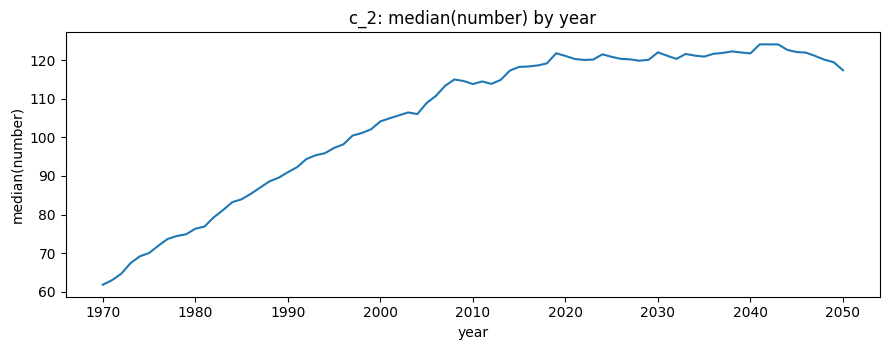

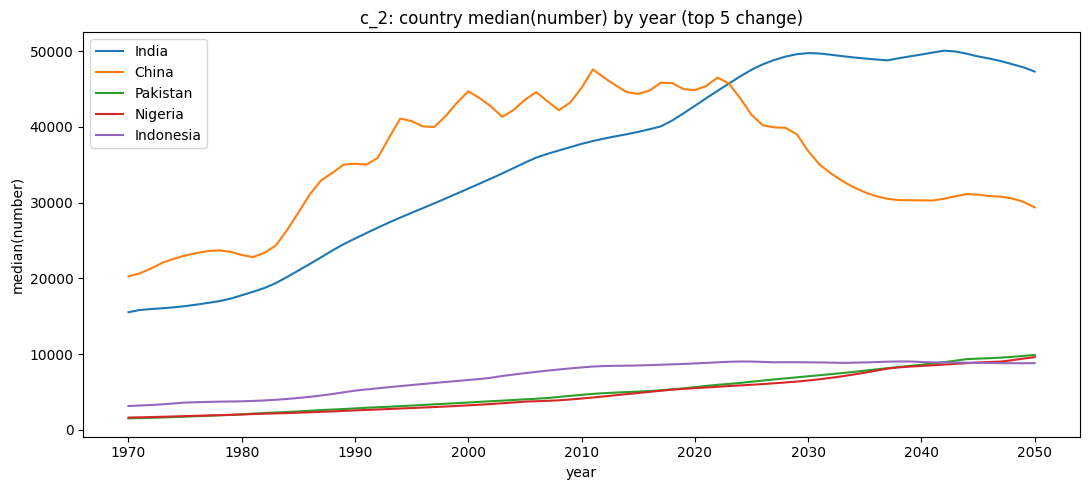

In [83]:
# ---------- helpers (auto-detect columns) ----------
def pick_col(df, hints, require_numeric=False):
    """Pick a column by hint list. Tries exact name, then substring."""
    cols = list(df.columns)
    lows = [c.lower() for c in cols]
    # exact
    for i, lc in enumerate(lows):
        if lc in hints:
            c = cols[i]
            if not require_numeric: return c
            if pd.to_numeric(df[c], errors="coerce").notna().any(): return c
    # substring
    for i, lc in enumerate(lows):
        if any(h in lc for h in hints):
            c = cols[i]
            if not require_numeric: return c
            if pd.to_numeric(df[c], errors="coerce").notna().any(): return c
    return None

def choose_value_col(df, year_col):
    """Choose the most informative numeric column (varies across years)."""
    # Prefer common value names first
    preferred = ["value","rate","percentage","percent","ratio","count","number","index","score"]
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    # also allow numeric-coercible object cols
    for c in df.columns:
        if c not in num_cols:
            ser = pd.to_numeric(df[c], errors="coerce")
            if ser.notna().sum() > 0:
                num_cols.append(c)
    # exclude the detected year column
    num_cols = [c for c in num_cols if c != year_col]
    if not num_cols:
        return None
    # put preferred names up front
    num_cols = sorted(num_cols, key=lambda c: (0 if c.lower() in preferred else 1, c.lower()))
    # score by variability over years
    scores = []
    y = pd.to_numeric(c_2[year_col], errors="coerce")
    for c in num_cols:
        s = pd.to_numeric(c_2[c], errors="coerce")
        tmp = pd.DataFrame({year_col: y, c: s}).dropna()
        if tmp.empty:
            scores.append((-np.inf, c))
            continue
        yr = tmp.groupby(year_col)[c].median()
        # require at least 5 years and more than one unique value
        if len(yr) < 5 or yr.nunique() < 2:
            scores.append((-np.inf, c))
            continue
        score = float(yr.std()) * np.sqrt(tmp[c].notna().mean())
        scores.append((score, c))
    scores.sort(reverse=True)
    best = scores[0][1]
    return best if scores[0][0] != -np.inf else None

# Detect columns
YEAR_COL    = pick_col(c_2, {"year","time","period","yr","refyear"}, require_numeric=True)
COUNTRY_COL = pick_col(c_2, {"country","country_name","countryorarea","location","area"})
REGION_COL  = pick_col(c_2, {"region","subregion","continent","geo","world_bank_region"})
VALUE_COL   = choose_value_col(c_2, YEAR_COL) if YEAR_COL else None

# ---------- concise EDA (prints) ----------
print("Shape:", c_2.shape)
print("Detected -> YEAR:", YEAR_COL, "| COUNTRY:", COUNTRY_COL, "| REGION:", REGION_COL, "| VALUE:", VALUE_COL)
print("Columns:", list(c_2.columns))
miss = (c_2.isna().mean() * 100).round(2).sort_values(ascending=False)
print("\nMissing % by column:\n", miss)

if YEAR_COL:
    yrs = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    if yrs.notna().any():
        print(f"\nYear span: {int(yrs.min())}–{int(yrs.max())}")

# ======================================================================
# Chart 1 — Global trend of VALUE_COL by year (median across countries)
# ======================================================================
if YEAR_COL and VALUE_COL:
    y = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    v = pd.to_numeric(c_2[VALUE_COL], errors="coerce")
    ts_global = (pd.DataFrame({YEAR_COL: y, VALUE_COL: v})
                 .dropna()
                 .groupby(YEAR_COL)[VALUE_COL].median()
                 .sort_index())
    if not ts_global.empty:
        plt.figure(figsize=(9,3.6))
        plt.plot(ts_global.index, ts_global.values)
        plt.title(f"c_2: median({VALUE_COL}) by year")
        plt.xlabel(YEAR_COL); plt.ylabel(f"median({VALUE_COL})")
        plt.tight_layout(); plt.show()

# ==========================================================================================
# Chart 2 — Regional trends (top 3 regions by absolute change from first to last available)
# ==========================================================================================
REGION_COL = pick_col(
    c_2,
    {
        "region","region_name","regionname",
        "subregion","sub_region",
        "continent","continent_name",
        "wb_region","world_bank_region",
        "un_region","macroregion","macro_region",
        "income_group","incomelevel","income_level"
    },
    require_numeric=False
)

# =================== Chart 2 (robust) ===================
# Regional trends: top 3 groups by absolute change; with safe fallbacks
# --- widen REGION detection (put this near your other picks) ---
REGION_COL = pick_col(
    c_2,
    {
        "region","region_name","regionname",
        "subregion","sub_region",
        "continent","continent_name",
        "wb_region","world_bank_region",
        "un_region","macroregion","macro_region",
        "income_group","incomelevel","income_level"
    },
    require_numeric=False
)

# =================== Chart 2 (robust) ===================
# Regional trends: top 3 groups by absolute change; with safe fallbacks
if YEAR_COL and VALUE_COL:
    grp = REGION_COL

    # final fallback: pick the first available grouping among these if REGION_COL missing
    if not grp or grp not in c_2.columns:
        for cand in ["income_group","incomelevel","income_level","continent","subregion","region"]:
            if cand in c_2.columns:
                grp = cand; break

    if grp and grp in c_2.columns:
        y = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
        v = pd.to_numeric(c_2[VALUE_COL], errors="coerce")
        tmp = c_2[[grp]].copy()
        tmp[YEAR_COL] = y; tmp[VALUE_COL] = v
        tmp = tmp.dropna(subset=[YEAR_COL, VALUE_COL])

        if not tmp.empty:
            reg_ts = tmp.groupby([grp, YEAR_COL])[VALUE_COL].median().unstack(0)
            reg_ts = reg_ts.sort_index()
            # need at least 2 distinct years to draw lines
            if reg_ts.shape[0] >= 2:
                # choose top 3 by absolute change (with ffill/bfill for gaps)
                _filled = reg_ts.ffill().bfill()
                delta = (_filled.iloc[-1] - _filled.iloc[0]).abs().dropna()
                top_regs = delta.sort_values(ascending=False).head(3).index.tolist()

                # fallback: if no deltas (e.g., constant/NaN), pick top-3 by latest level
                if not top_regs:
                    top_regs = _filled.iloc[-1].sort_values(ascending=False).head(3).index.tolist()

                if top_regs:
                    plt.figure(figsize=(10,4))
                    for r in top_regs:
                        plt.plot(reg_ts.index, reg_ts[r], label=str(r))
                    plt.title(f"c_2: regional median({VALUE_COL}) by year (top 3 change)")
                    plt.xlabel(YEAR_COL); plt.ylabel(f"median({VALUE_COL})")
                    plt.legend()
                    plt.tight_layout(); plt.show()
            else:
                # not enough time points → show latest-year bars by group (still informative)
                latest = int(tmp[YEAR_COL].max())
                bars = (tmp[tmp[YEAR_COL] == latest]
                        .groupby(grp)[VALUE_COL].median()
                        .sort_values(ascending=False).head(12))
                if not bars.empty:
                    plt.figure(figsize=(9,4))
                    plt.bar(bars.index.astype(str), bars.values)
                    plt.xticks(rotation=45, ha="right")
                    plt.title(f"c_2: {grp} median({VALUE_COL}) — latest year {latest}")
                    plt.xlabel(grp); plt.ylabel(f"median({VALUE_COL})")
                    plt.tight_layout(); plt.show()


# ==========================================================================================
# Chart 3 — Country trends (top 5 countries by absolute change, ≥10-year coverage)
# ==========================================================================================
if YEAR_COL and COUNTRY_COL and VALUE_COL:
    y = pd.to_numeric(c_2[YEAR_COL], errors="coerce")
    v = pd.to_numeric(c_2[VALUE_COL], errors="coerce")
    tmp = c_2[[COUNTRY_COL]].copy()
    tmp[YEAR_COL] = y; tmp[VALUE_COL] = v
    tmp = tmp.dropna(subset=[YEAR_COL, VALUE_COL])
    if not tmp.empty:
        ct_ts = tmp.groupby([COUNTRY_COL, YEAR_COL])[VALUE_COL].median().unstack(0)
        # keep countries with good coverage
        good = ct_ts.apply(lambda s: s.notna().sum() >= 10, axis=0)
        ct_ts = ct_ts.loc[:, good]
        if ct_ts.shape[1] >= 1:
            deltas = (ct_ts.ffill().bfill().iloc[-1] - ct_ts.ffill().bfill().iloc[0]).abs()
            top_ctrs = deltas.sort_values(ascending=False).head(5).index.tolist()
            plt.figure(figsize=(11,5))
            for c in top_ctrs:
                plt.plot(ct_ts.index, ct_ts[c], label=str(c))
            plt.title(f"c_2: country median({VALUE_COL}) by year (top 5 change)")
            plt.xlabel(YEAR_COL); plt.ylabel(f"median({VALUE_COL})")
            plt.legend()
            plt.tight_layout(); plt.show()


================ c_2 ================


,value
dataset,c_2
rows,145800
cols,8
numeric_cols,4
categorical_cols,4
missing_%,0.0
year_col,year
year_min,1970
year_max,2050
country_col,countryorarea


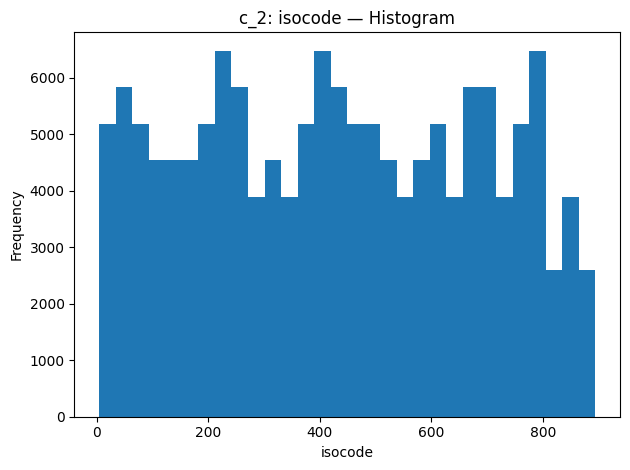

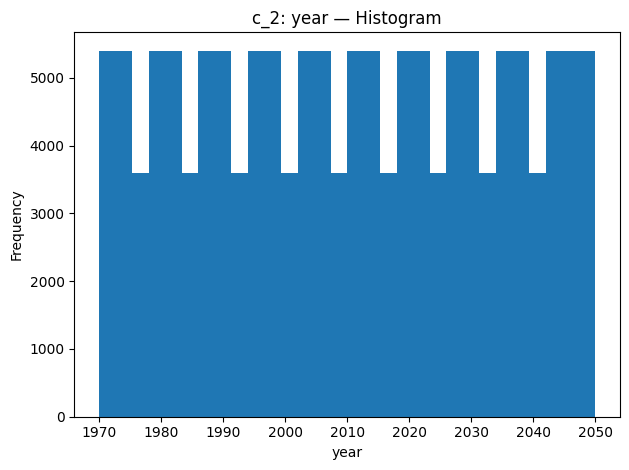

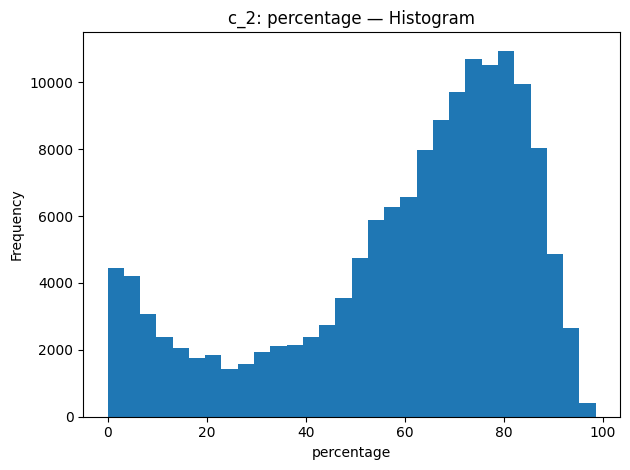

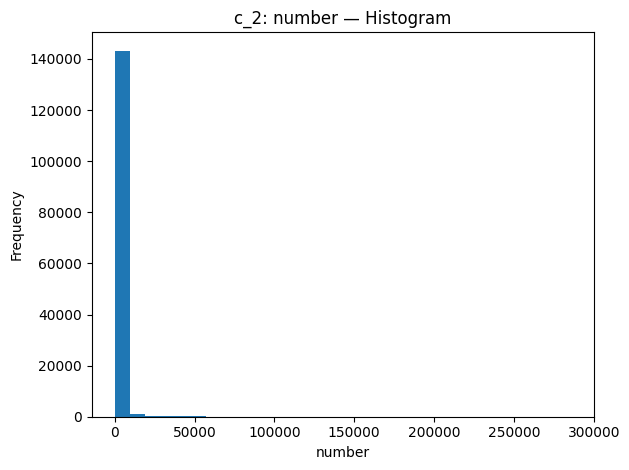

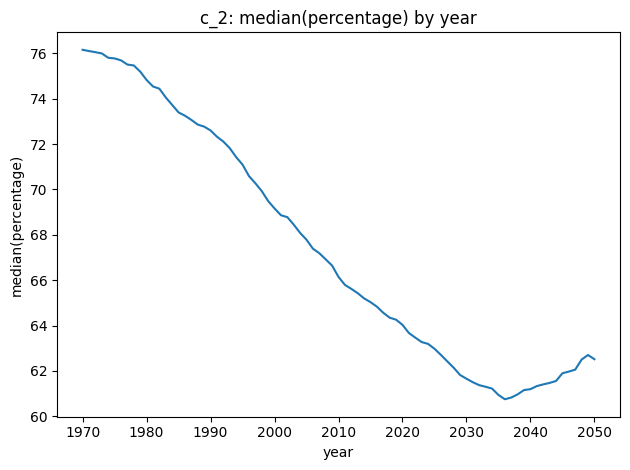

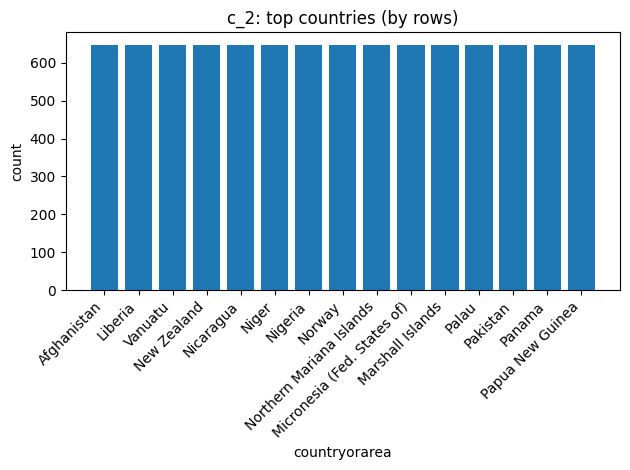

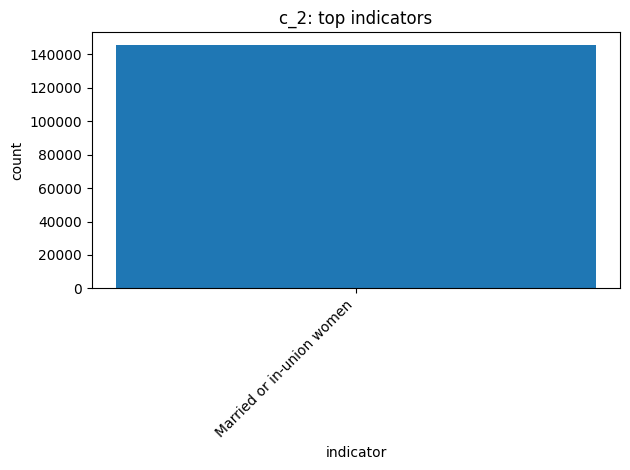

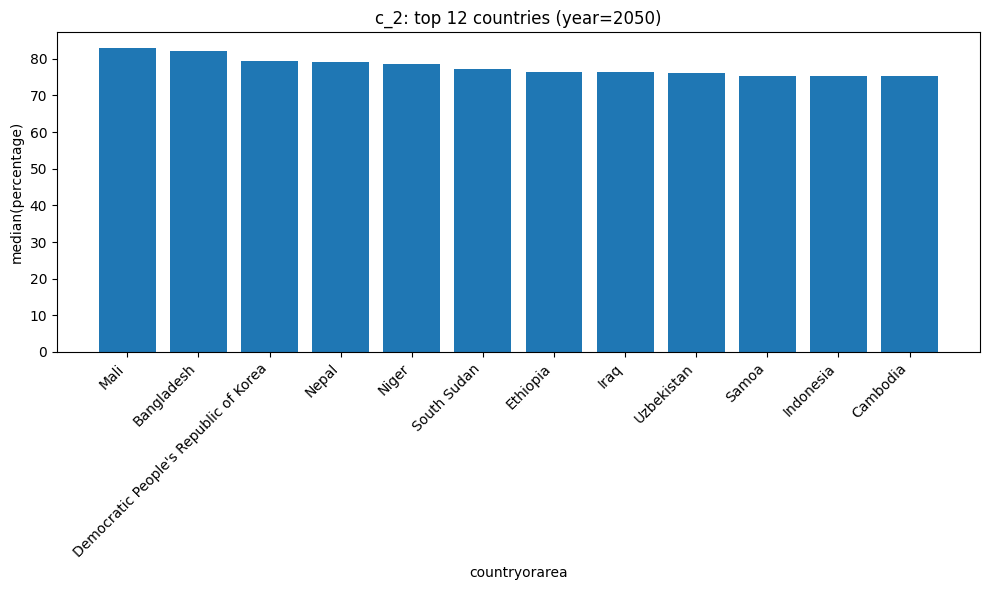


================ c_3 ================


,value
dataset,c_3
rows,271604
cols,12
numeric_cols,5
categorical_cols,7
missing_%,0.0
year_col,year_start
year_min,1954
year_max,2019
country_col,country


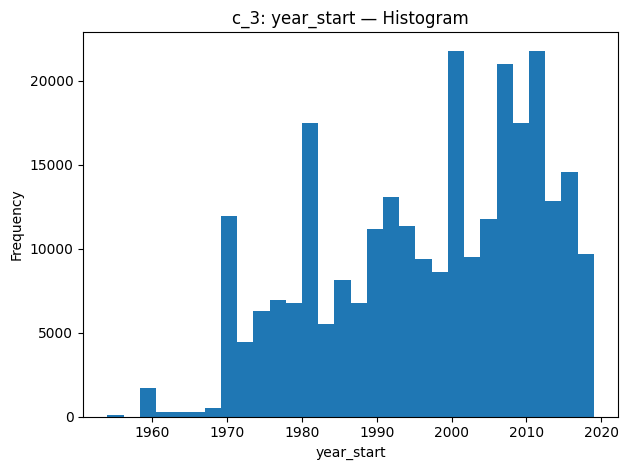

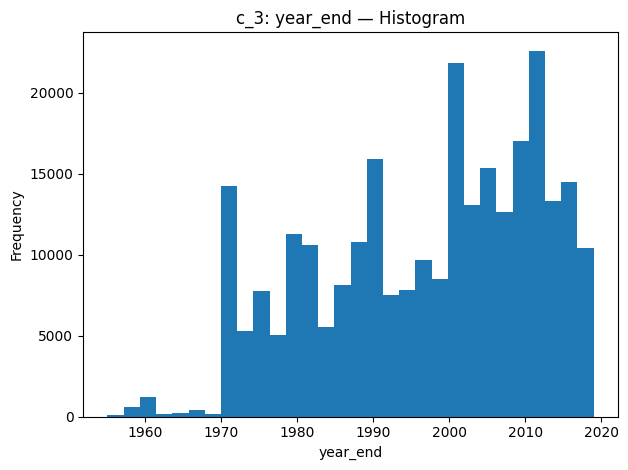

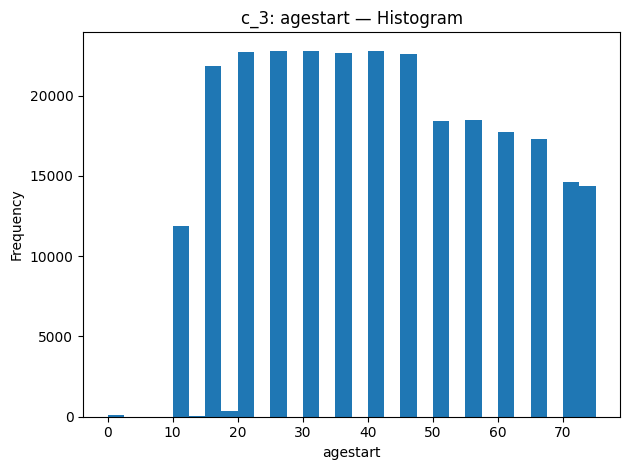

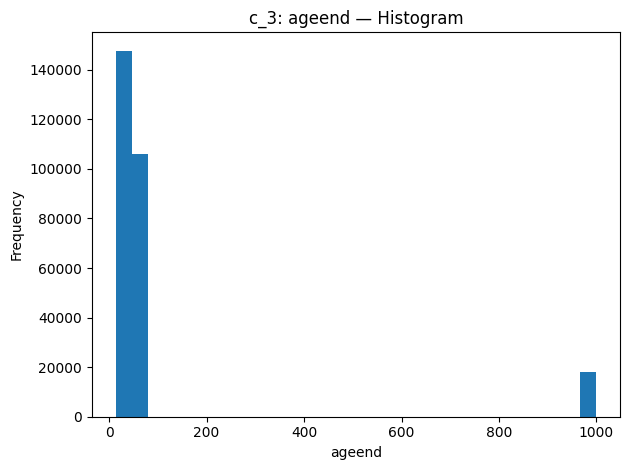

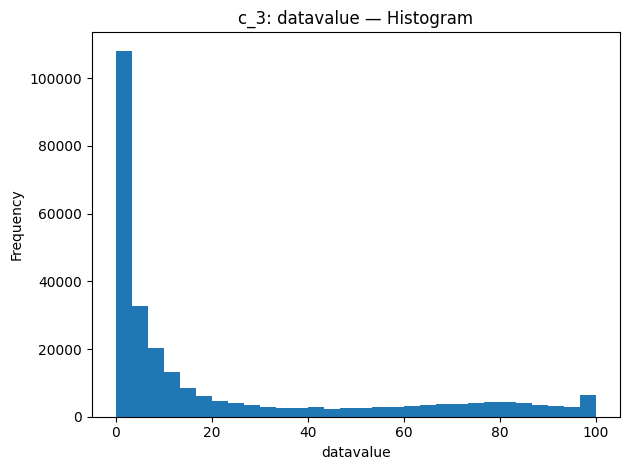

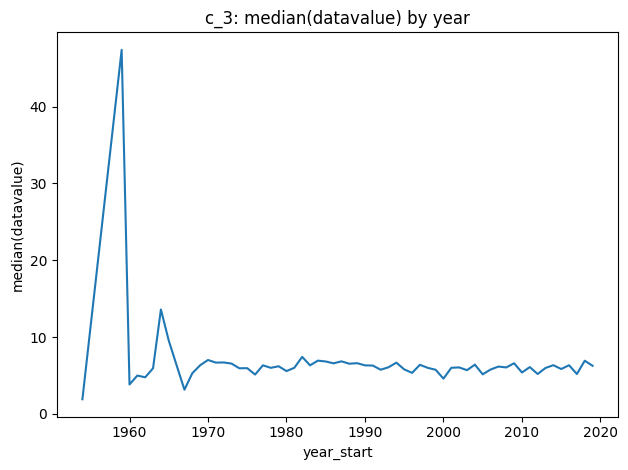

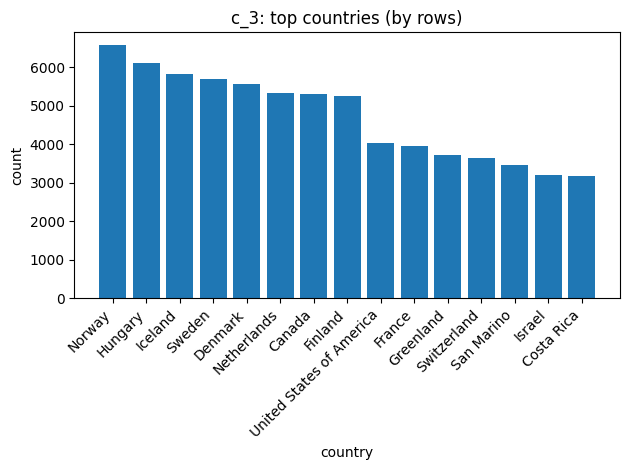

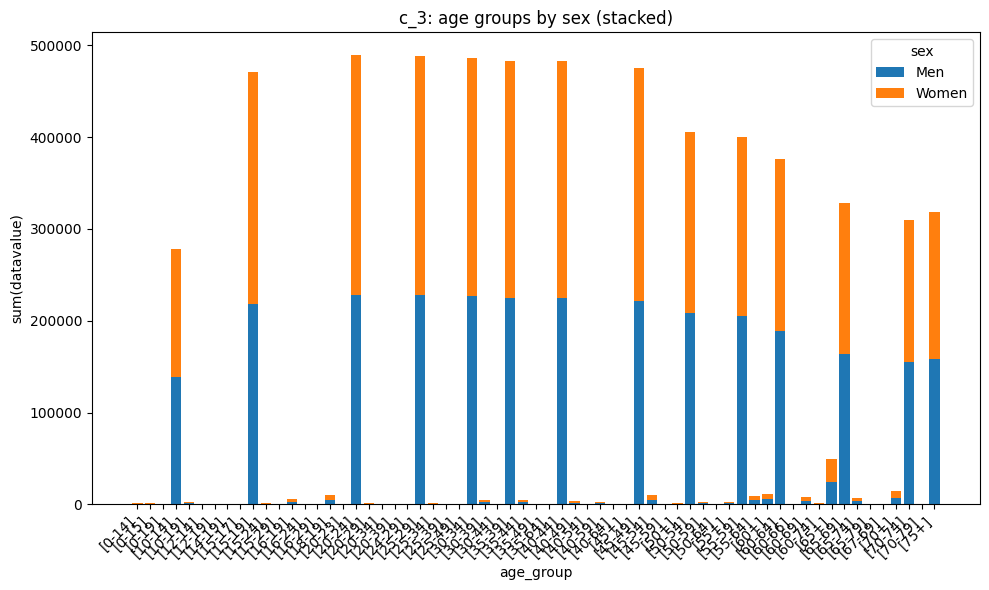

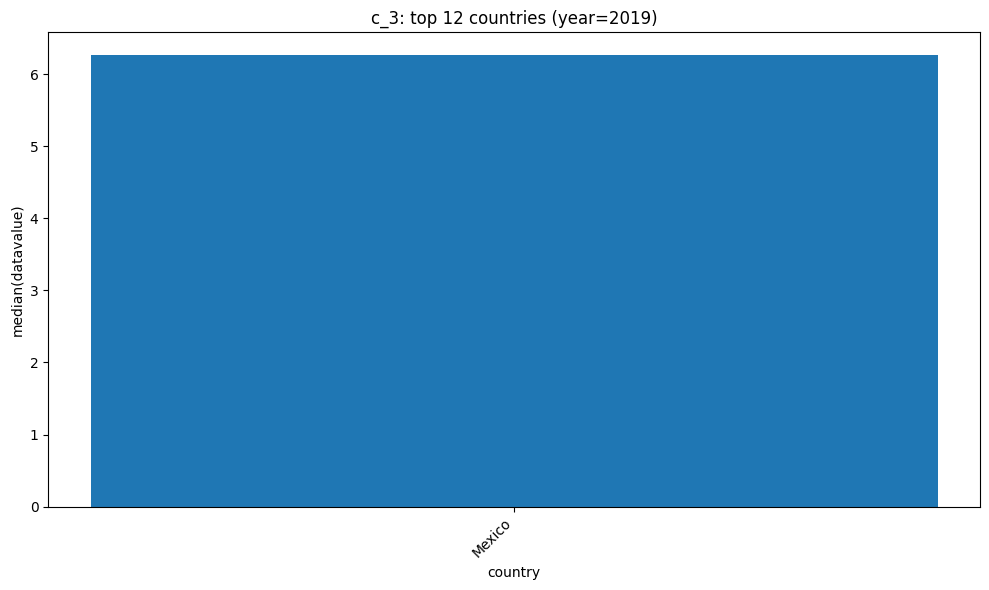


================ c_4 ================


,value
dataset,c_4
rows,78901
cols,9
numeric_cols,3
categorical_cols,6
missing_%,0.0
year_col,datasourcestartyear
year_min,1950
year_max,2018
country_col,countryorarea


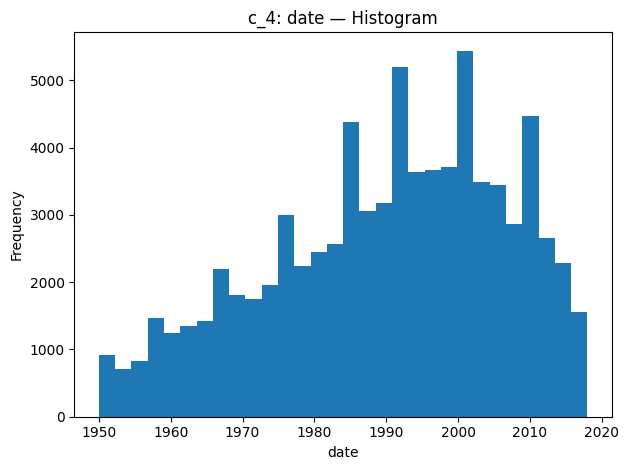

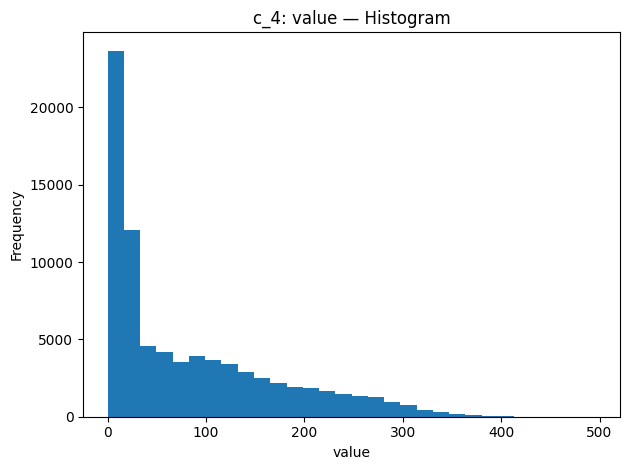

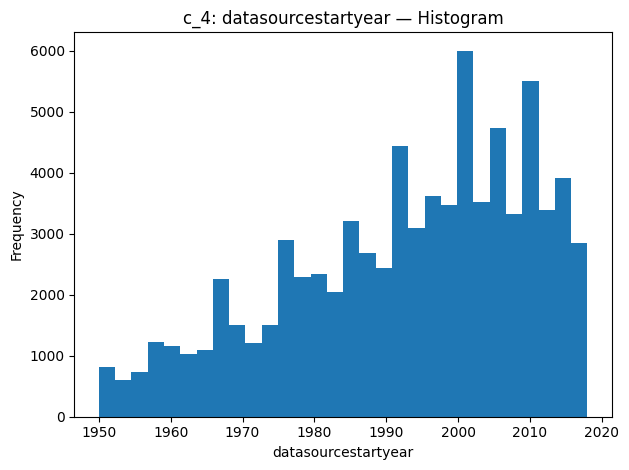

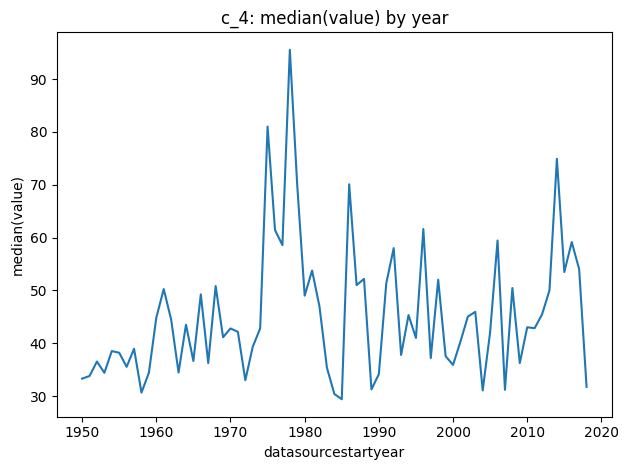

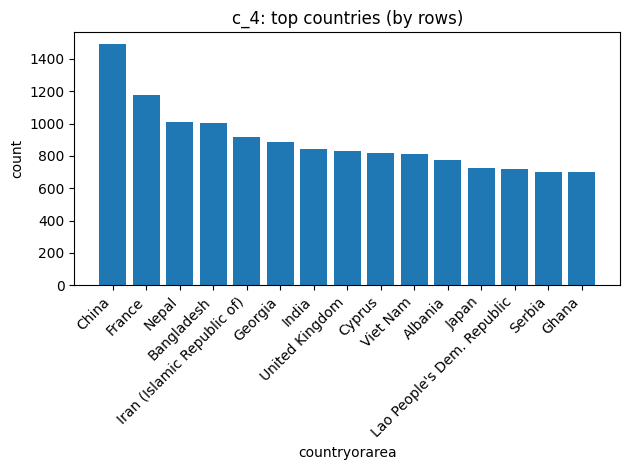

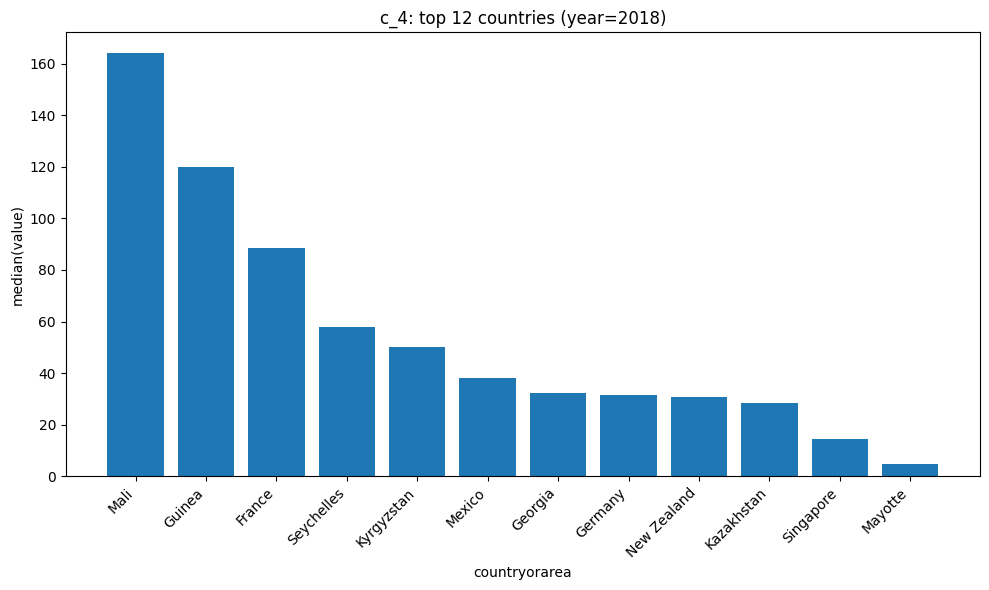


================ c_5 ================


,value
dataset,c_5
rows,55826
cols,9
numeric_cols,4
categorical_cols,5
missing_%,0.0
year_col,
year_min,
year_max,
country_col,country


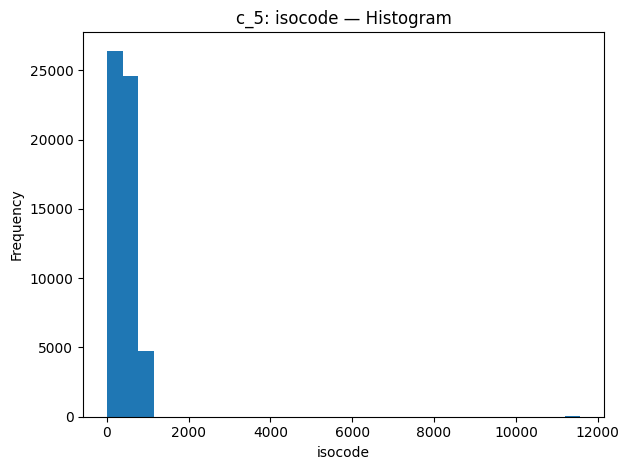

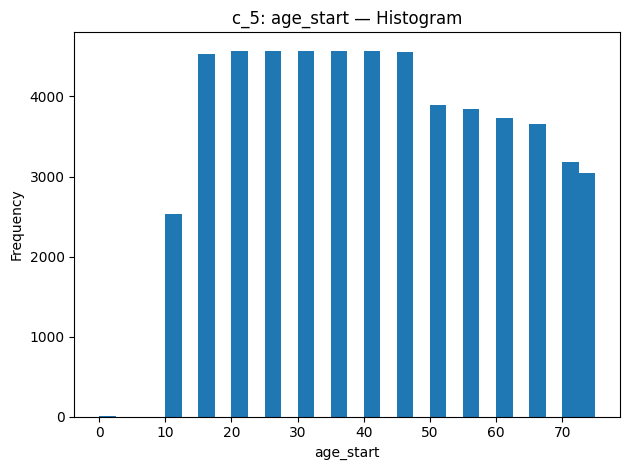

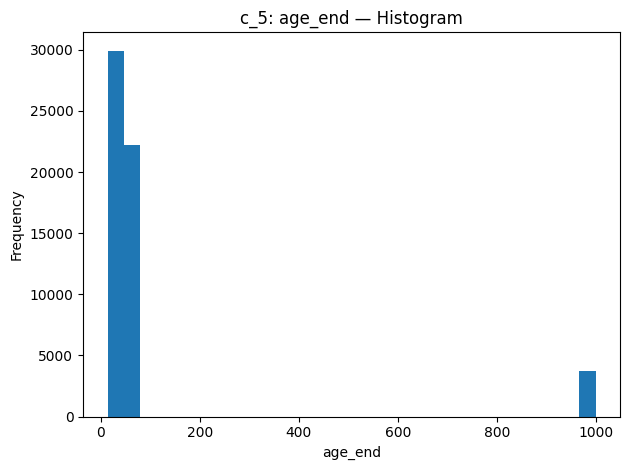

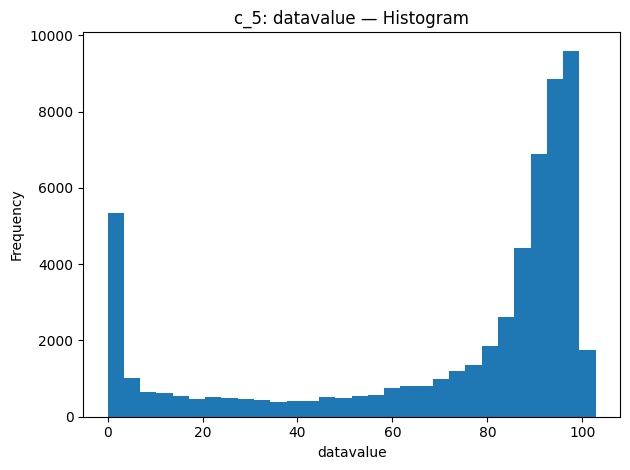

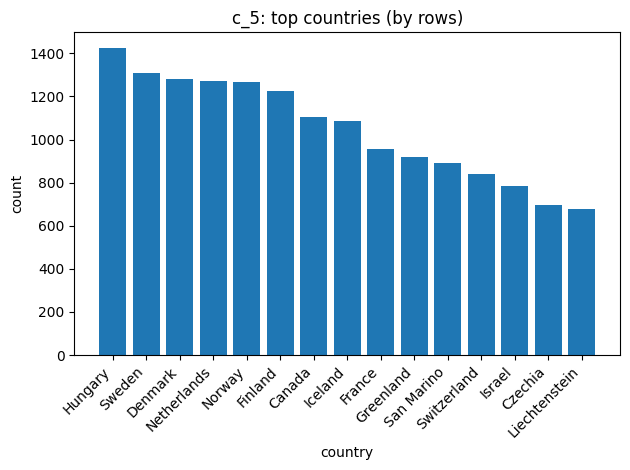

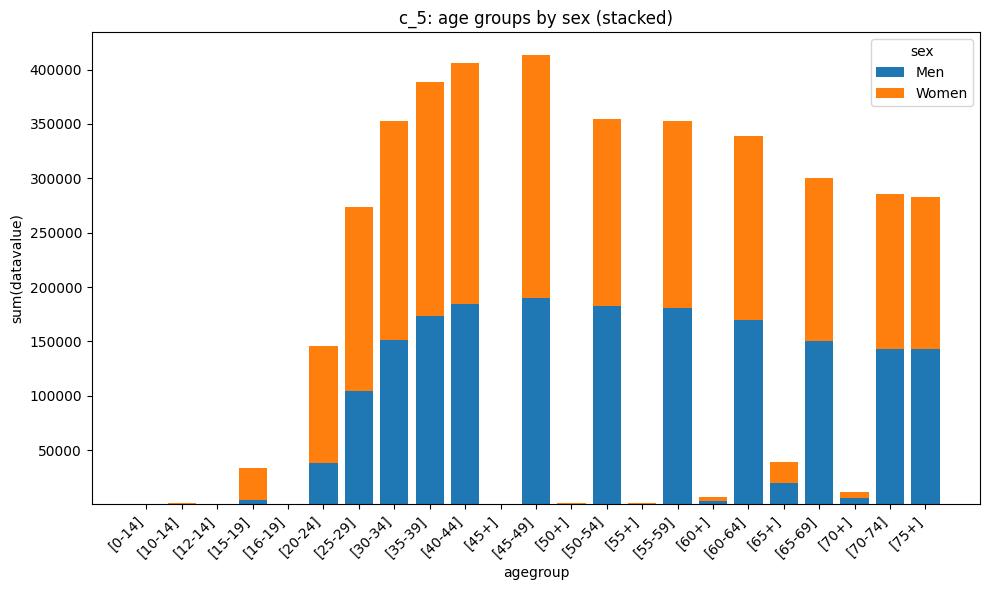

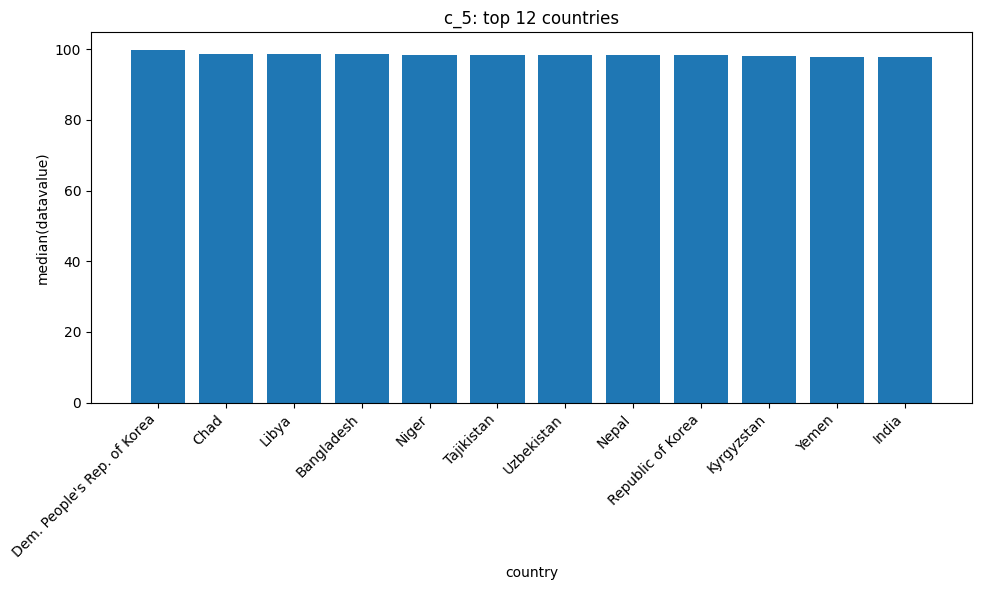


================ c_6 ================


,value
dataset,c_6
rows,53714
cols,10
numeric_cols,4
categorical_cols,6
missing_%,0.0
year_col,
year_min,
year_max,
country_col,country


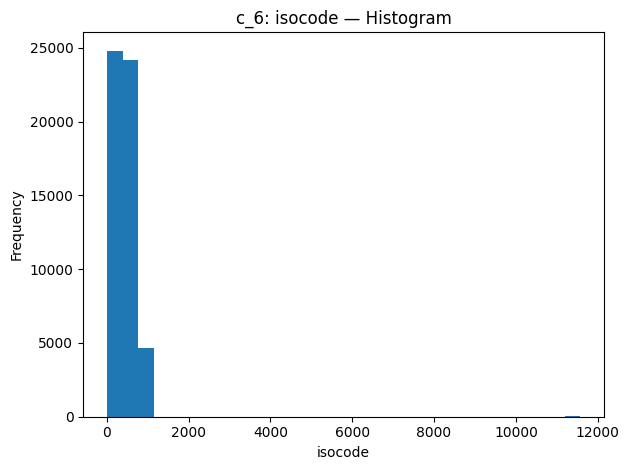

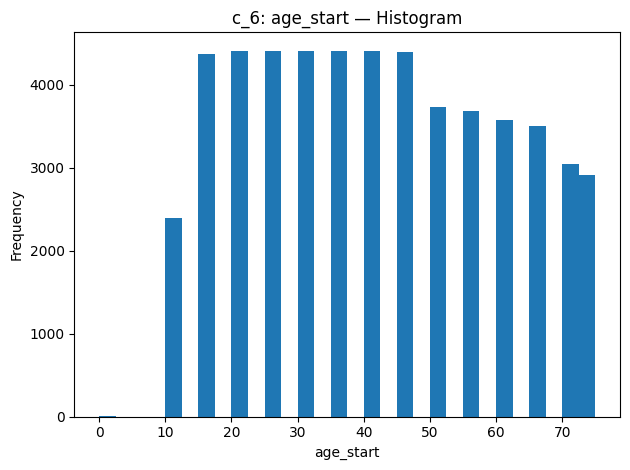

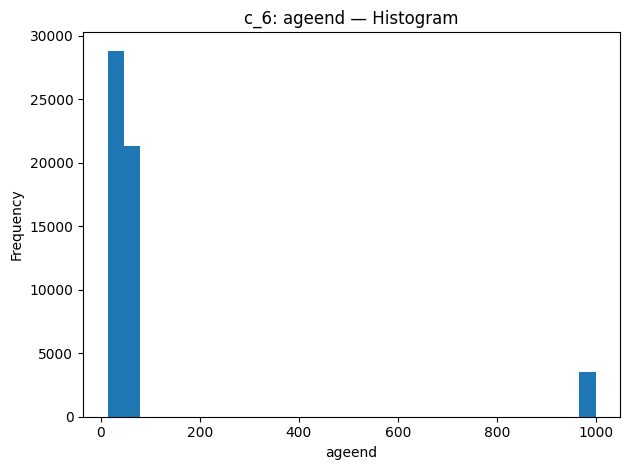

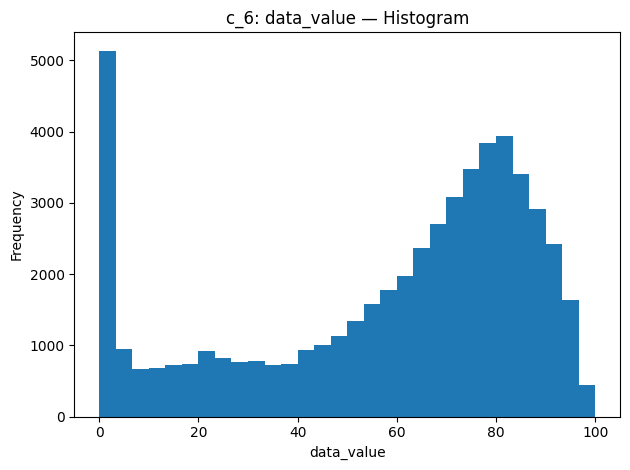

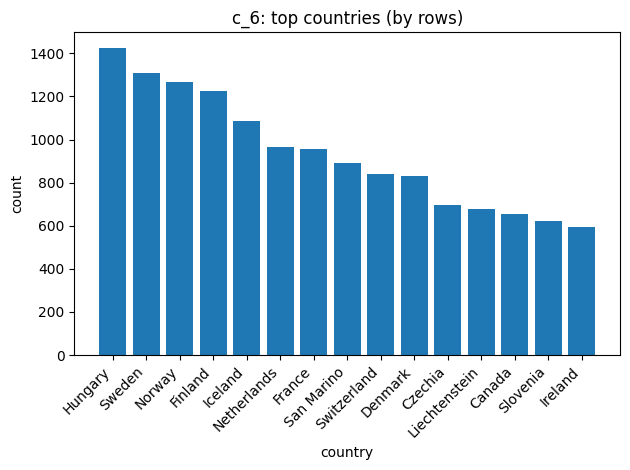

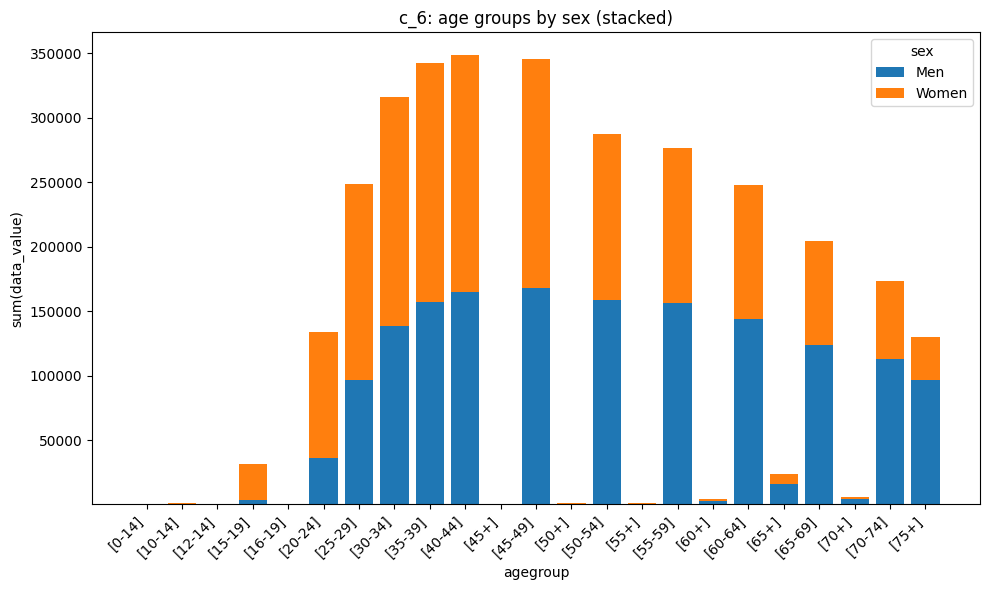

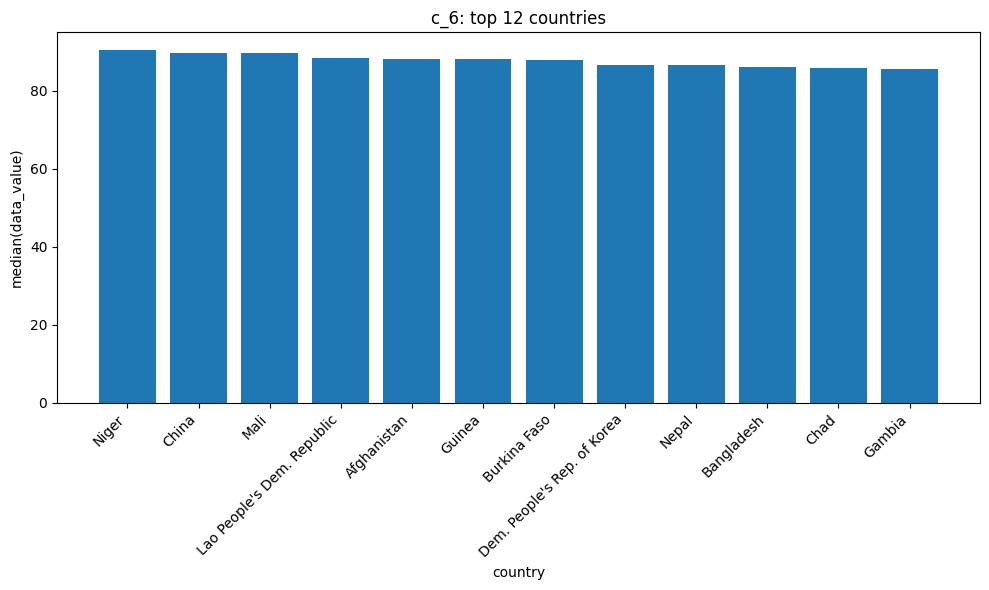


================ c_7 ================


,value
dataset,c_7
rows,28512
cols,8
numeric_cols,4
categorical_cols,4
missing_%,0.0
year_col,year
year_min,1970
year_max,2050
country_col,


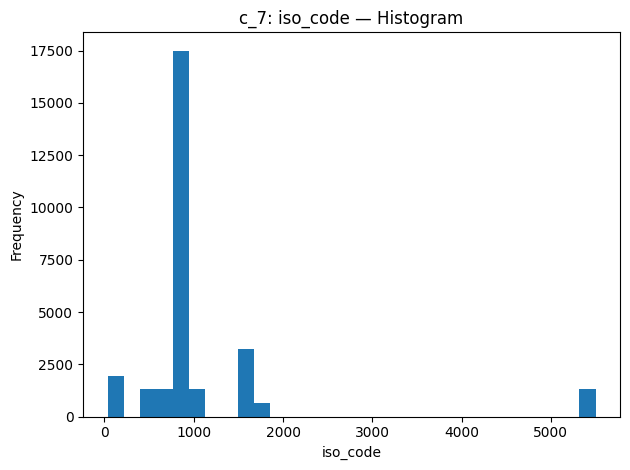

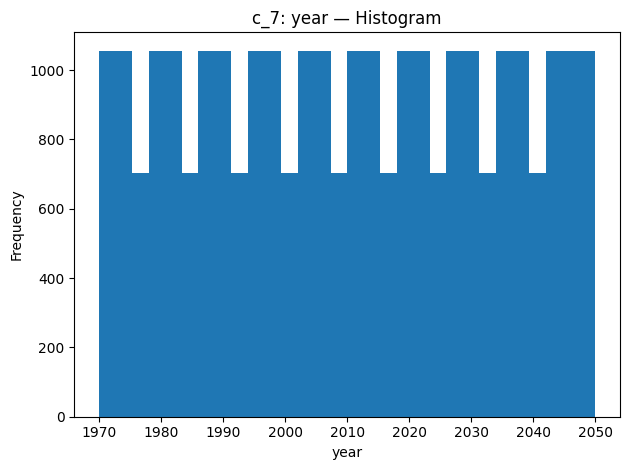

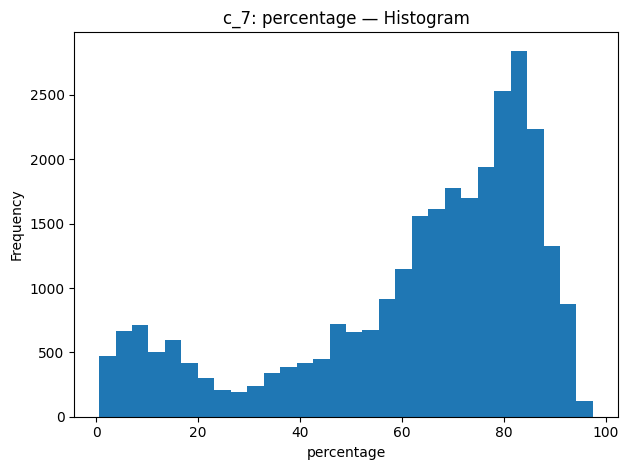

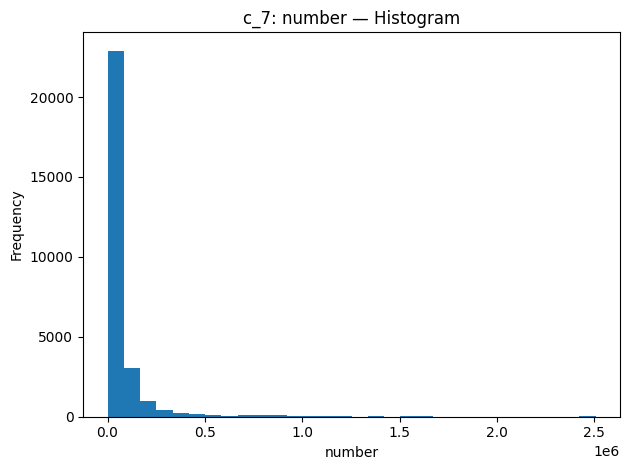

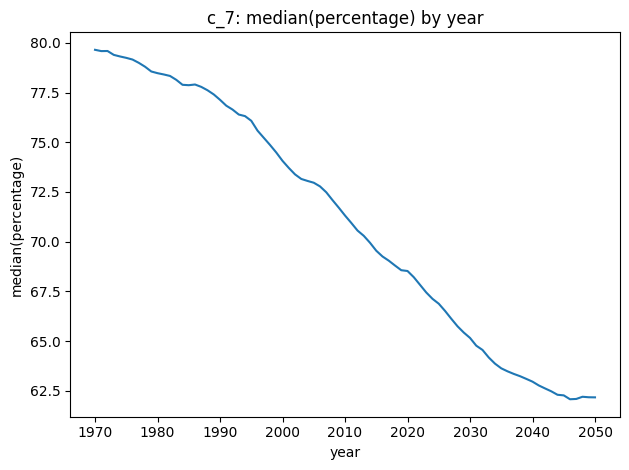

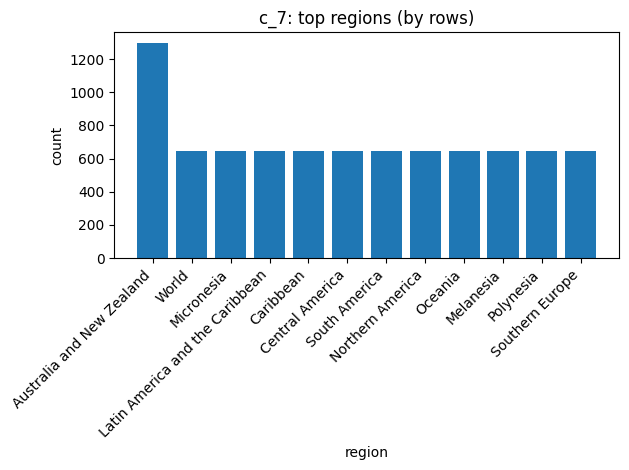

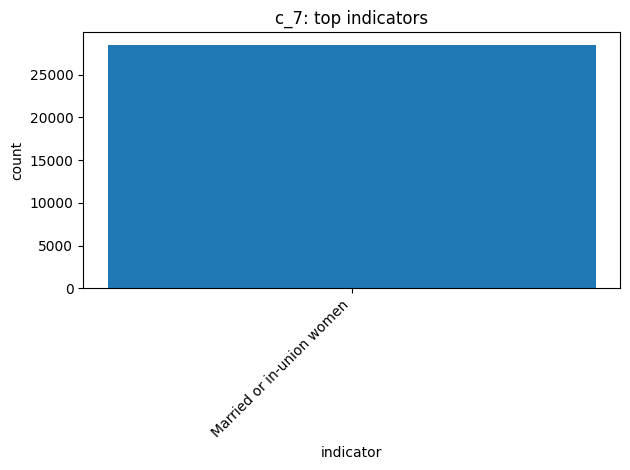


================ c_8 ================


,value
dataset,c_8
rows,12544
cols,11
numeric_cols,4
categorical_cols,7
missing_%,0.0
year_col,year
year_min,2024
year_max,2024
country_col,country


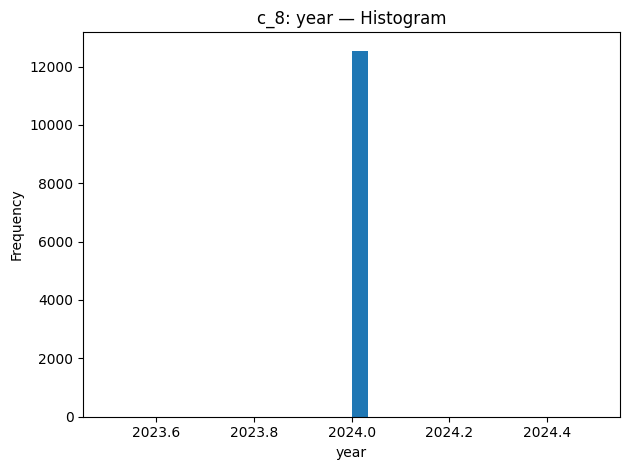

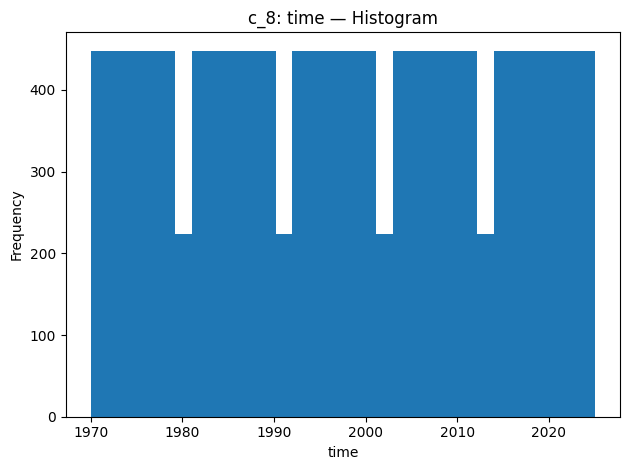

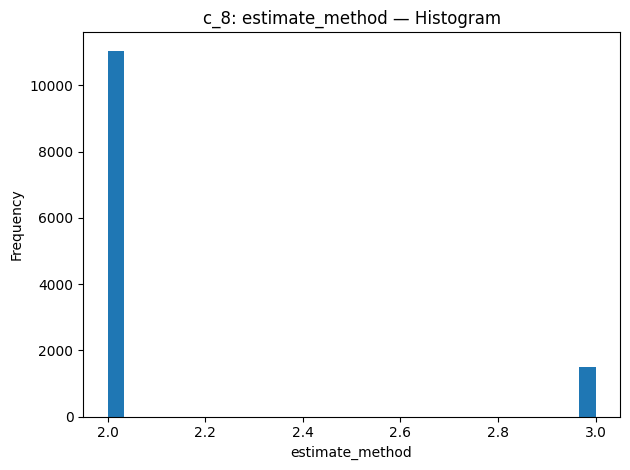

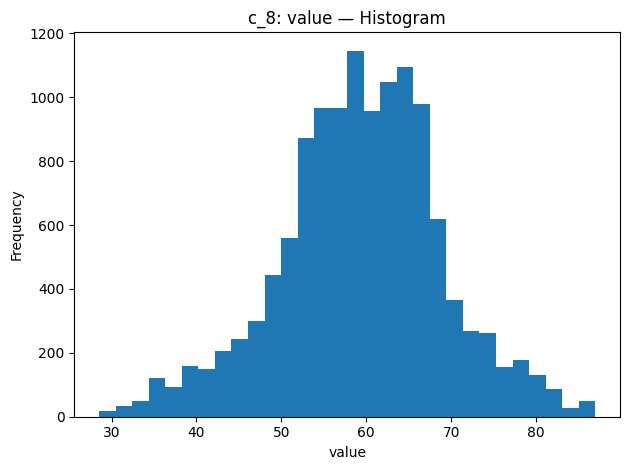

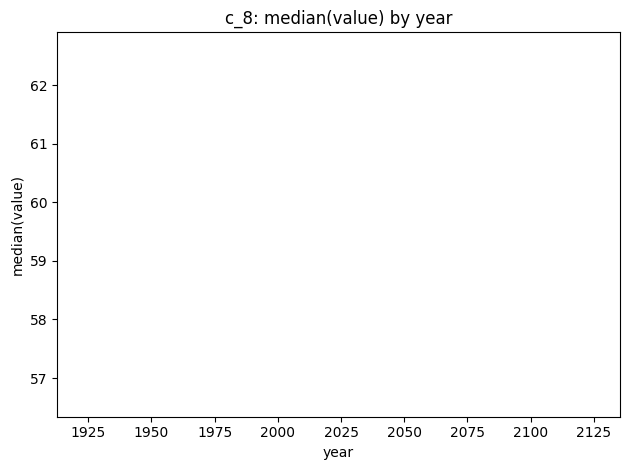

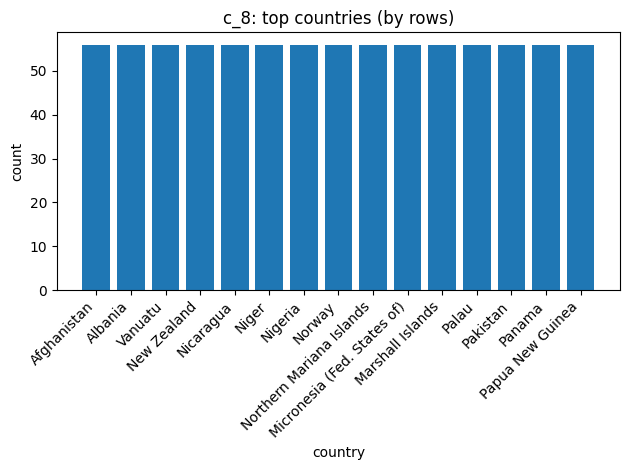

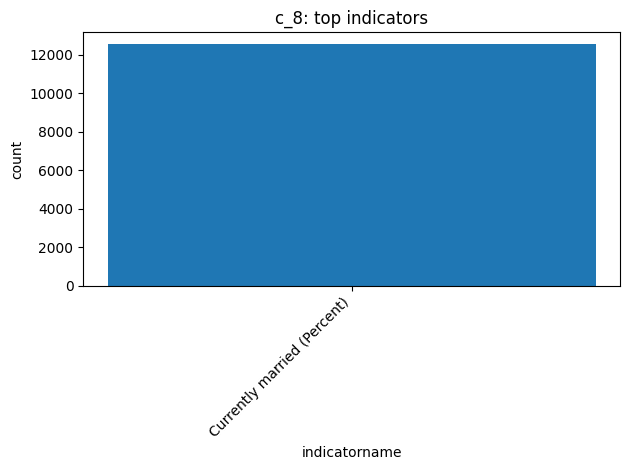

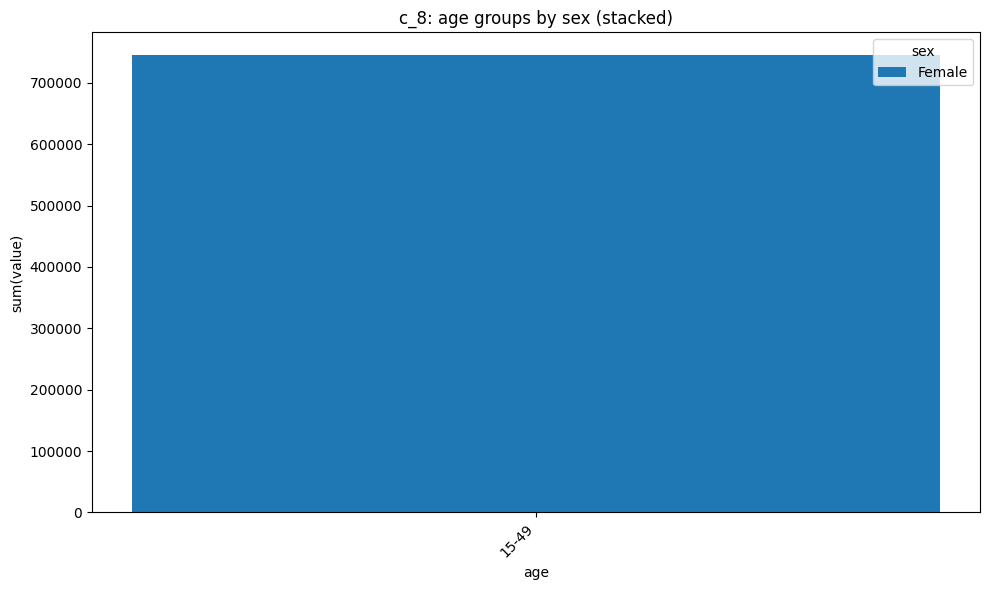

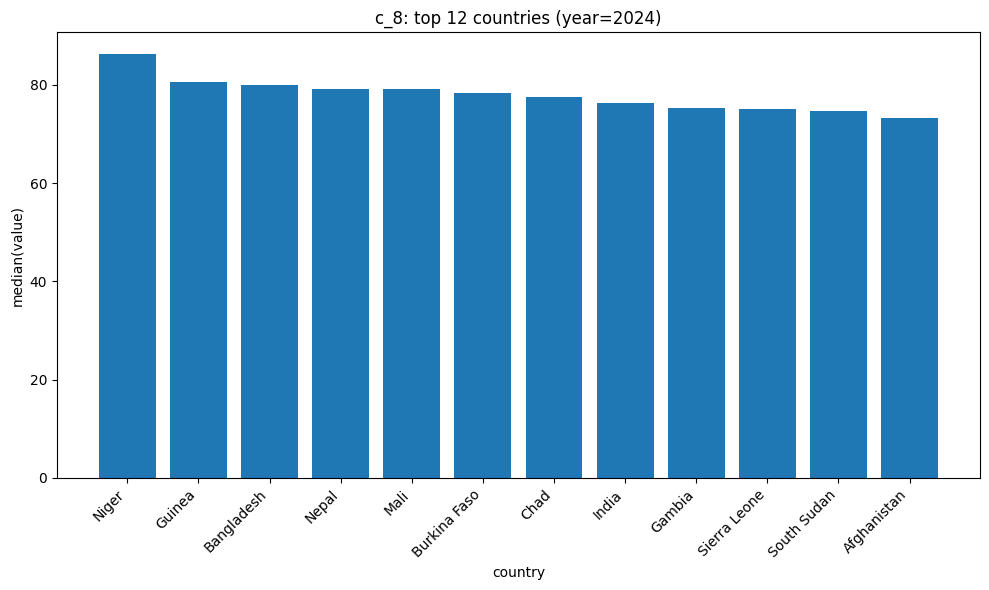


================ c_9 ================


,value
dataset,c_9
rows,1047
cols,4
numeric_cols,2
categorical_cols,2
missing_%,0.0
year_col,year
year_min,1990
year_max,2021
country_col,country


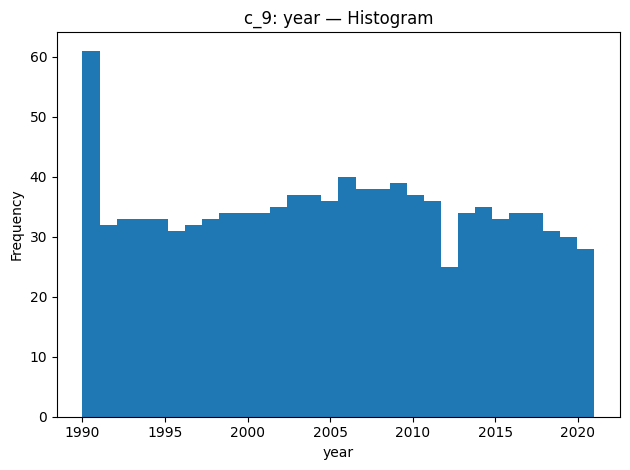

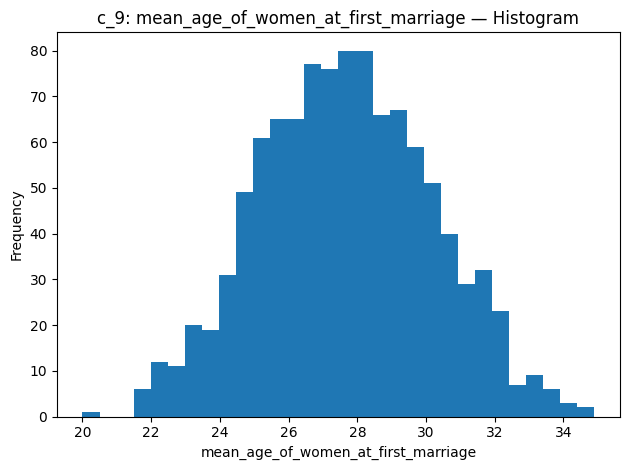

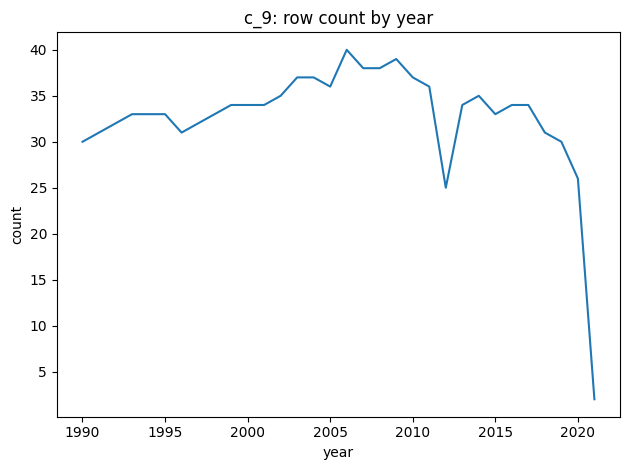

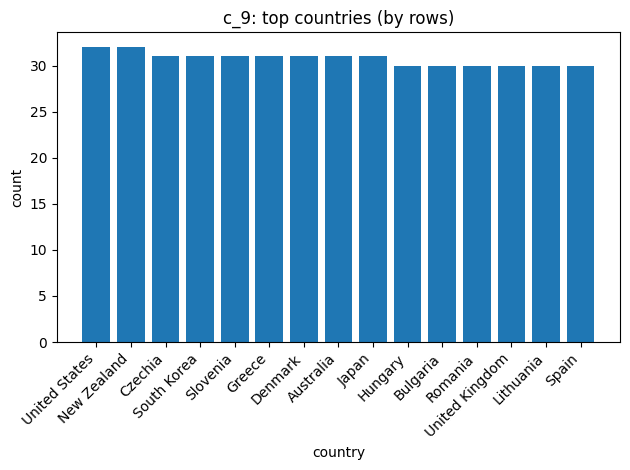

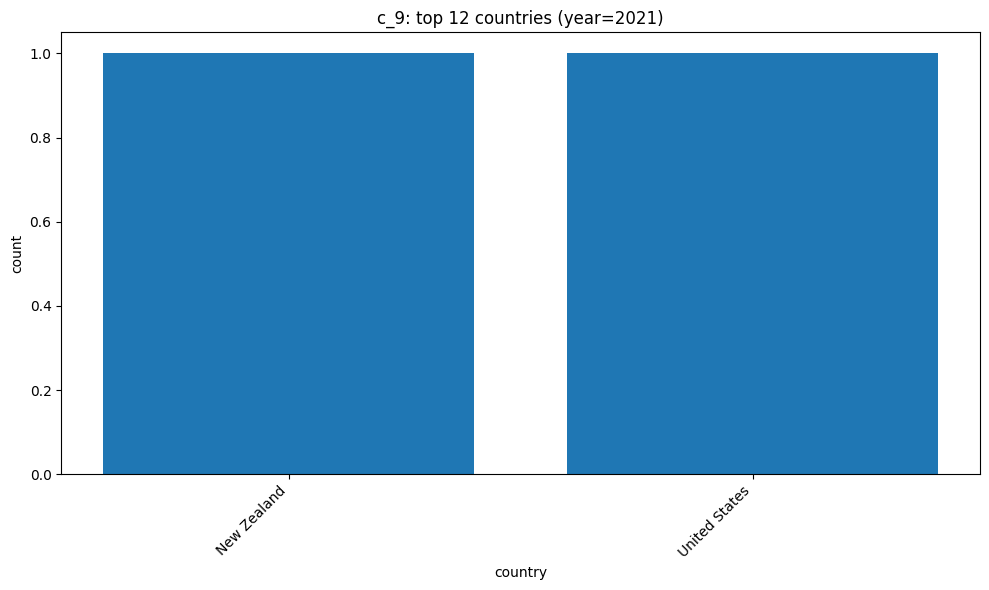


================ c_10 ================


,value
dataset,c_10
rows,2427
cols,4
numeric_cols,2
categorical_cols,2
missing_%,0.0
year_col,year
year_min,1886
year_max,2020
country_col,country


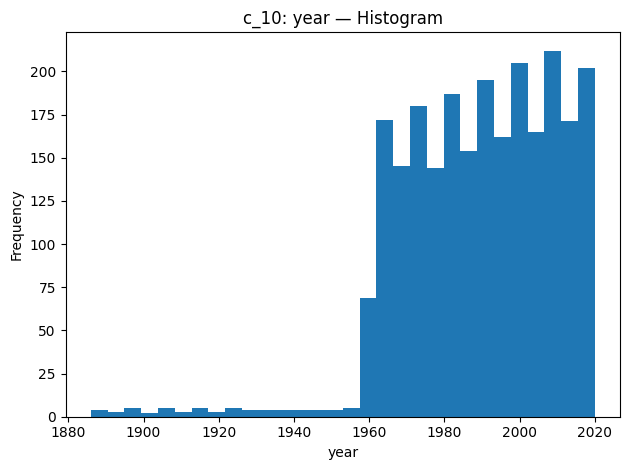

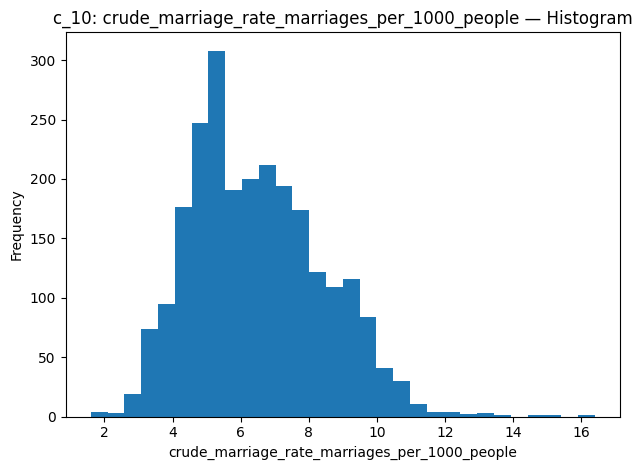

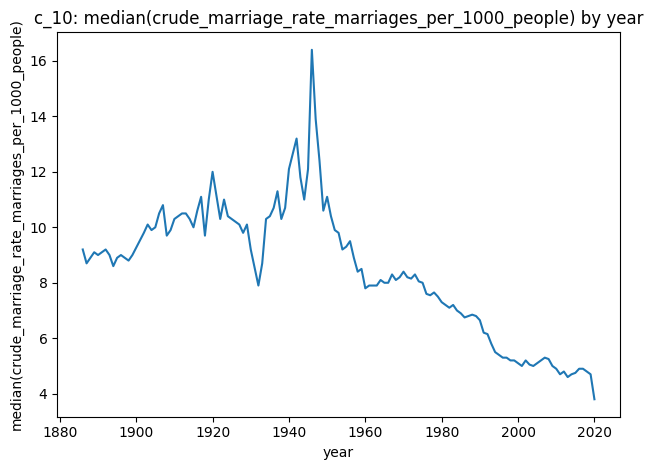

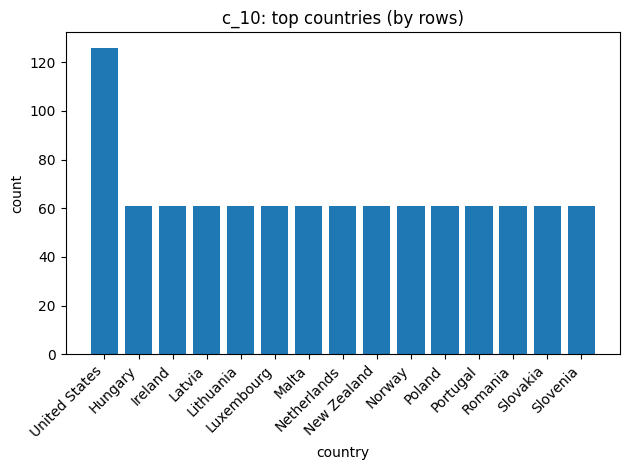

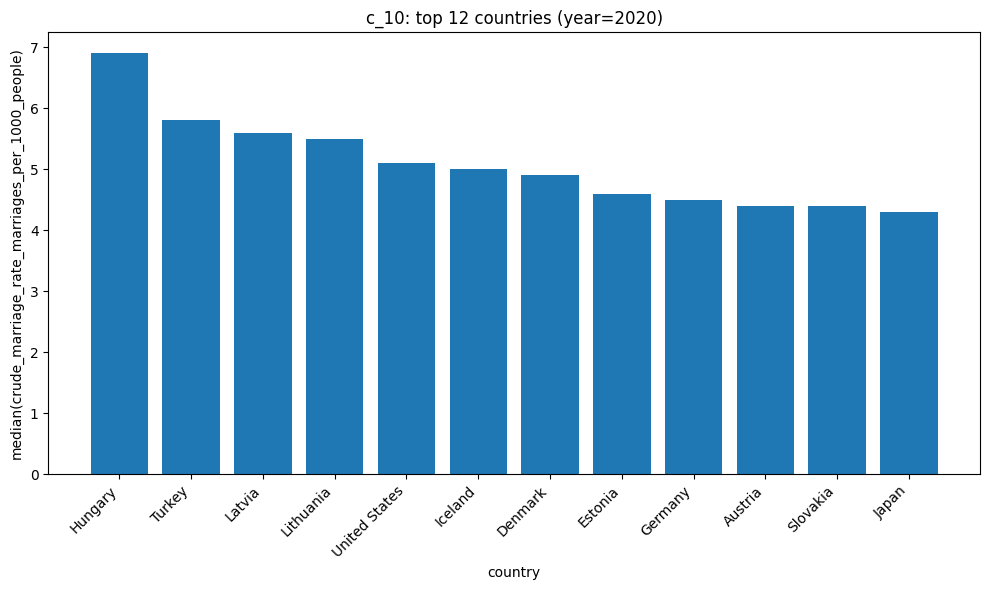


================ c_11 ================


,value
dataset,c_11
rows,2211
cols,6
numeric_cols,4
categorical_cols,2
missing_%,0.0
year_col,year
year_min,1960
year_max,2020
country_col,country


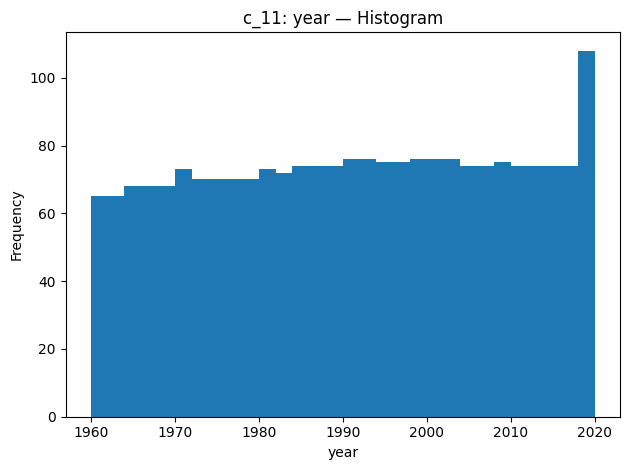

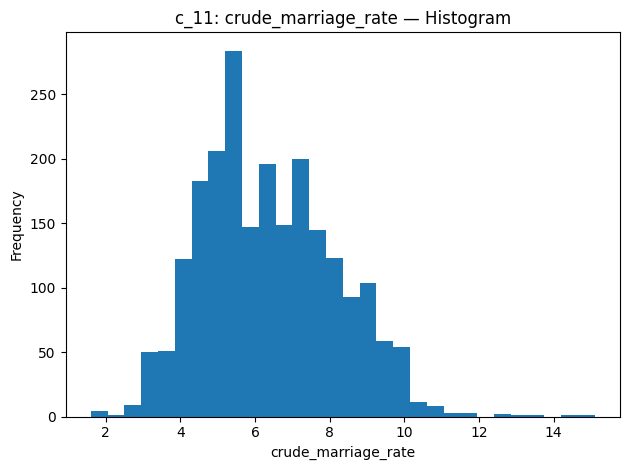

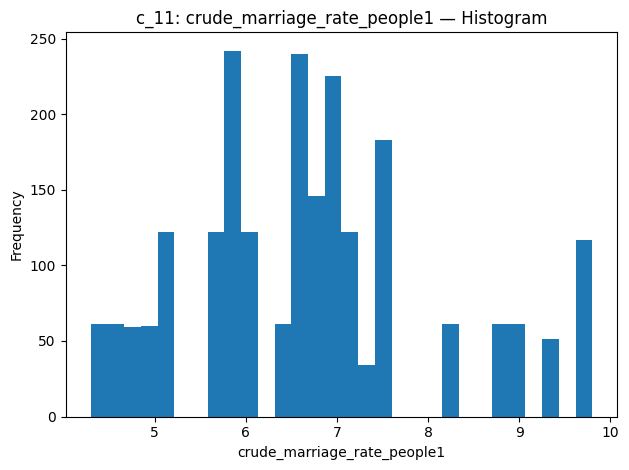

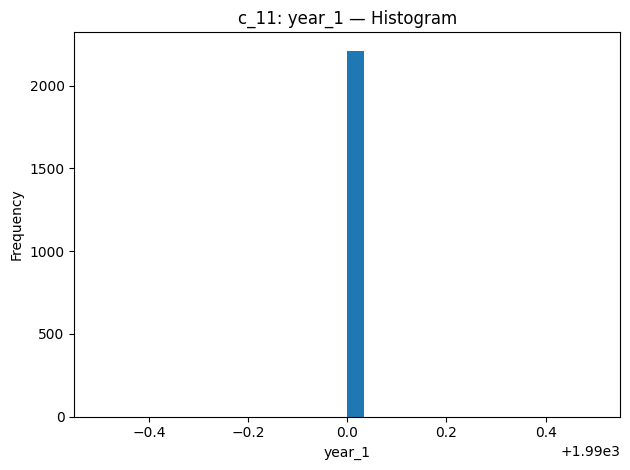

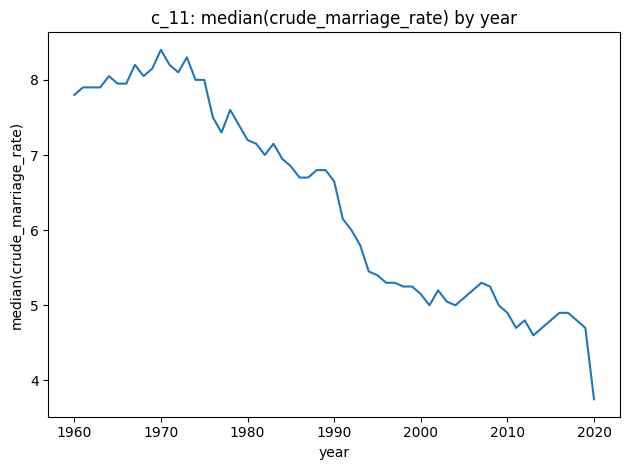

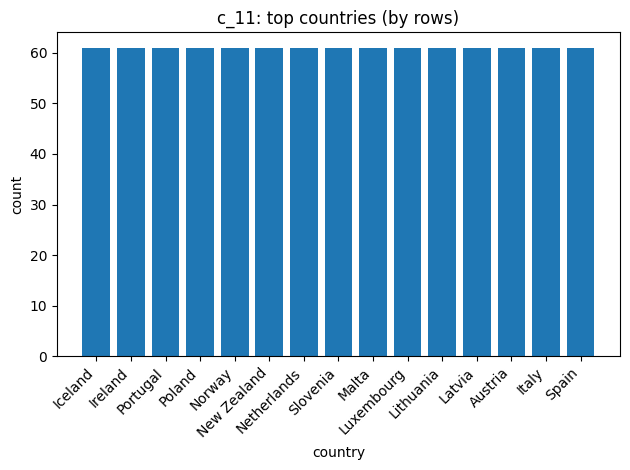

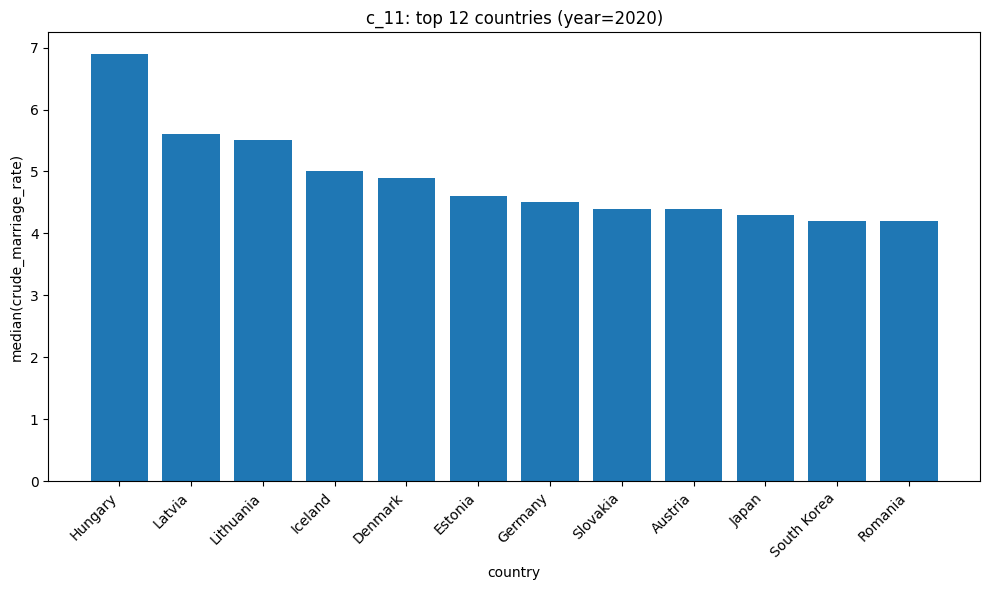


=== Combined EDA summary (all datasets) ===


,dataset,rows,cols,numeric_cols,categorical_cols,missing_%,year_col,year_min,year_max,country_col,n_countries,region_col,n_regions,sex_col,n_sexes,age_col,n_age_vals,indicator_col,value_col
0,c_2,145800,8,4,4,0.0,year,1970,2050,countryorarea,225,,0,,0,agegroup,8,indicator,percentage
1,c_3,271604,12,5,7,0.0,year_start,1954,2019,country,235,,0,sex,2,age_group,63,,datavalue
2,c_4,78901,9,3,6,0.0,datasourcestartyear,1950,2018,countryorarea,201,,0,,0,agegroup,8,,value
3,c_5,55826,9,4,5,0.0,,,,country,233,,0,sex,2,agegroup,23,,datavalue
4,c_6,53714,10,4,6,0.0,,,,country,233,,0,sex,2,agegroup,23,,data_value
5,c_7,28512,8,4,4,0.0,year,1970,2050,,0,region,43,,0,age_group,8,indicator,percentage
6,c_8,12544,11,4,7,0.0,year,2024,2024,country,224,,0,sex,1,age,1,indicatorname,value
7,c_9,1047,4,2,2,0.0,year,1990,2021,country,41,,0,,0,mean_age_of_women_at_first_marriage,179,,
8,c_10,2427,4,2,2,0.0,year,1886,2020,country,45,,0,,0,crude_marriage_rate_marriages_per_1000_people,109,,crude_marriage_rate_marriages_per_1000_people
9,c_11,2211,6,4,2,0.0,year,1960,2020,country,38,,0,,0,crude_marriage_rate,101,,crude_marriage_rate


In [79]:
# ================================================================
# Quick EDA + Key Charts for c_2 ... c_11 (already-loaded DataFrames)
# Requirements:
#  - Variables: c_2 ... c_11 exist as pandas DataFrames
#  - Uses only matplotlib (no seaborn). One plot per figure.
#  - Comments are in English as requested.
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Put your dataframes in a dict
datasets = {
    "c_2":  c_2,
    "c_3":  c_3,
    "c_4":  c_4,
    "c_5":  c_5,
    "c_6":  c_6,
    "c_7":  c_7,
    "c_8":  c_8,
    "c_9":  c_9,
    "c_10": c_10,
    "c_11": c_11,
}

# ---------- Helper functions ----------

def pick_col(df: pd.DataFrame, *needles, numeric: bool | None = None):
    """Pick first column whose name contains any of the needles; can force numeric/non-numeric."""
    for col in df.columns:
        low = col.lower()
        if any(n in low for n in needles):
            if numeric is None:
                return col
            ok = pd.api.types.is_numeric_dtype(df[col])
            if (numeric and ok) or (numeric is False and not ok):
                return col
    return None

def year_span(df: pd.DataFrame):
    """Return (year_col, min_year, max_year) if a year-like column exists."""
    y = pick_col(df, "year")
    if y is None:
        y = pick_col(df, "time", "period")
    if y is None:
        return None, None, None
    s = pd.to_numeric(df[y], errors="coerce")
    if s.notna().sum() == 0:
        return y, None, None
    return y, int(s.min()), int(s.max())

def eda_summary_one(name: str, df: pd.DataFrame) -> pd.Series:
    """Build a very compact EDA summary for one dataset."""
    rows, cols = df.shape
    miss_pct = round((df.isna().sum().sum() / df.size * 100) if df.size else 0.0, 2)
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    cat_cols = [c for c in df.columns if c not in num_cols]
    ycol, ymin, ymax = year_span(df)
    country = pick_col(df, "country")
    region  = pick_col(df, "region")
    sex     = pick_col(df, "sex", "gender")
    age     = pick_col(df, "age_group", "age")
    indicator = pick_col(df, "indicator", "metric", "measure")
    value    = pick_col(df, "value", "rate", "percentage", "percent", "ratio", numeric=True)

    return pd.Series({
        "dataset": name,
        "rows": rows,
        "cols": cols,
        "numeric_cols": len(num_cols),
        "categorical_cols": len(cat_cols),
        "missing_%": miss_pct,
        "year_col": ycol or "",
        "year_min": ymin or "",
        "year_max": ymax or "",
        "country_col": country or "",
        "n_countries": int(df[country].nunique(dropna=True)) if country else 0,
        "region_col": region or "",
        "n_regions": int(df[region].nunique(dropna=True)) if region else 0,
        "sex_col": sex or "",
        "n_sexes": int(df[sex].nunique(dropna=True)) if sex else 0,
        "age_col": age or "",
        "n_age_vals": int(df[age].nunique(dropna=True)) if age else 0,
        "indicator_col": indicator or "",
        "value_col": value or "",
    })

def plot_numeric_histograms(df: pd.DataFrame, name: str, max_cols: int = 6, bins: int = 30):
    """Plot histograms for the first few numeric columns."""
    nums = df.select_dtypes(include="number").columns.tolist()[:max_cols]
    for col in nums:
        ser = df[col].dropna()
        if ser.empty: 
            continue
        plt.figure()
        plt.hist(ser, bins=bins)
        plt.title(f"{name}: {col} — Histogram")
        plt.xlabel(col); plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

def plot_year_trend(df: pd.DataFrame, name: str, value_col: str | None):
    """Plot a simple time series: median(value) by year if available, else row counts by year."""
    ycol, _, _ = year_span(df)
    if ycol is None:
        return
    years = pd.to_numeric(df[ycol], errors="coerce")
    tmp = df.copy()
    tmp[ycol] = years
    tmp = tmp.dropna(subset=[ycol])
    if tmp.empty:
        return
    if value_col:
        s = tmp.groupby(ycol)[value_col].median()
        title = f"{name}: median({value_col}) by year"
        ylabel = f"median({value_col})"
    else:
        s = tmp.groupby(ycol).size()
        title = f"{name}: row count by year"
        ylabel = "count"
    plt.figure()
    plt.plot(s.index, s.values)
    plt.title(title)
    plt.xlabel(ycol); plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def plot_top_categories(df: pd.DataFrame, name: str, cat_col: str, top: int = 15, title: str | None = None):
    """Plot a simple bar chart for the top-N categories."""
    if not cat_col or cat_col not in df.columns:
        return
    vc = df[cat_col].value_counts().head(top)
    if vc.empty:
        return
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(title or f"{name}: top {top} {cat_col}")
    plt.xlabel(cat_col); plt.ylabel("count")
    plt.tight_layout()
    plt.show()

def plot_age_sex_stacked(df: pd.DataFrame, name: str, age_col: str, sex_col: str, value_col: str | None):
    """Stacked bar: age groups vs sex (counts if no numeric value)."""
    if age_col not in df.columns or sex_col not in df.columns:
        return
    tmp = df.copy()
    if value_col and value_col in df.columns and pd.api.types.is_numeric_dtype(df[value_col]):
        pv = tmp.pivot_table(index=age_col, columns=sex_col, values=value_col, aggfunc="sum")
    else:
        pv = tmp.groupby([age_col, sex_col]).size().unstack(fill_value=0)
    pv = pv.fillna(0)
    plt.figure(figsize=(10, 6))
    bottom = np.zeros(len(pv))
    for col in pv.columns:
        plt.bar(pv.index.astype(str), pv[col].values, bottom=bottom, label=str(col))
        bottom += pv[col].values
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{name}: age groups by sex (stacked)")
    plt.xlabel(age_col); plt.ylabel("count" if value_col is None else f"sum({value_col})")
    plt.legend(title="sex")
    plt.tight_layout()
    plt.show()

def plot_latest_top_countries(df: pd.DataFrame, name: str, country_col: str, value_col: str | None, n: int = 12):
    """Bar of top-N countries using latest year if available."""
    if not country_col or country_col not in df.columns:
        return
    ycol, _, _ = year_span(df)
    tmp = df.copy()
    if ycol:
        tmp[ycol] = pd.to_numeric(tmp[ycol], errors="coerce")
        latest = tmp[ycol].max()
        tmp = tmp[tmp[ycol] == latest]
    if value_col:
        agg = tmp.groupby(country_col)[value_col].median().sort_values(ascending=False).head(n)
        ylabel = f"median({value_col})"
    else:
        agg = tmp[country_col].value_counts().head(n)
        ylabel = "count"
    plt.figure(figsize=(10, 6))
    plt.bar(agg.index.astype(str), agg.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{name}: top {n} countries" + (f" (year={int(latest)})" if ycol else ""))
    plt.xlabel(country_col); plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def plot_1990_vs_2020(df: pd.DataFrame, name: str):
    """Special plot for c_11-like wide data: histograms + scatter if columns 1990 & 2020 exist."""
    cols_1990 = [c for c in df.columns if "1990" in c]
    cols_2020 = [c for c in df.columns if "2020" in c]
    if not cols_1990 or not cols_2020:
        return
    a, b = cols_1990[0], cols_2020[0]
    if not (pd.api.types.is_numeric_dtype(df[a]) and pd.api.types.is_numeric_dtype(df[b])):
        return
    # Histogram 1990
    plt.figure()
    plt.hist(df[a].dropna(), bins=30)
    plt.title(f"{name}: Histogram {a}"); plt.xlabel(a); plt.ylabel("Frequency")
    plt.tight_layout(); plt.show()
    # Histogram 2020
    plt.figure()
    plt.hist(df[b].dropna(), bins=30)
    plt.title(f"{name}: Histogram {b}"); plt.xlabel(b); plt.ylabel("Frequency")
    plt.tight_layout(); plt.show()
    # Scatter 1990 vs 2020
    plt.figure()
    plt.scatter(df[a], df[b])
    plt.title(f"{name}: {a} vs {b}"); plt.xlabel(a); plt.ylabel(b)
    plt.tight_layout(); plt.show()

# ---------- Run EDA + charts per dataset ----------

all_summaries = []
for name, df in datasets.items():
    print(f"\n================ {name} ================")
    # EDA summary (printed as a small table)
    summary = eda_summary_one(name, df)
    all_summaries.append(summary)
    display(summary.to_frame(name="value"))

    # Column picks to drive charts
    country = summary["country_col"] or None
    region  = summary["region_col"] or None
    sex     = summary["sex_col"] or None
    age     = summary["age_col"] or None
    value   = summary["value_col"] or None
    indicator = summary["indicator_col"] or None

    # 1) Histograms for numeric columns (up to 6)
    plot_numeric_histograms(df, name, max_cols=6, bins=30)

    # 2) Year trend (median value by year if available, else counts)
    plot_year_trend(df, name, value_col=value)

    # 3) Key categorical bars
    plot_top_categories(df, name, country, top=15, title=f"{name}: top countries (by rows)")
    if region:
        plot_top_categories(df, name, region, top=12, title=f"{name}: top regions (by rows)")
    if indicator:
        plot_top_categories(df, name, indicator, top=12, title=f"{name}: top indicators")

    # 4) Age × Sex stacked (if both exist)
    if age and sex:
        plot_age_sex_stacked(df, name, age_col=age, sex_col=sex, value_col=value)

    # 5) Latest top countries by value (if value + year exist)
    if country:
        plot_latest_top_countries(df, name, country_col=country, value_col=value, n=12)

    # 6) Special handling for c_11 (1990 vs 2020 wide format)
    if name == "c_11":
        plot_1990_vs_2020(df, name)

# Optional: collect all dataset summaries into a single DataFrame
eda_summary_all = pd.DataFrame(all_summaries).reset_index(drop=True)
print("\n=== Combined EDA summary (all datasets) ===")
display(eda_summary_all)
